Using cpu device
train_x tensor([[-0.4782, -0.2479],
        [-0.3750,  1.3339],
        [ 0.9571, -0.9047],
        [ 0.1876,  0.5870],
        [-1.2366,  1.2808],
        [-1.4385, -0.8285],
        [-1.5848, -1.1421],
        [ 1.5245, -0.6537],
        [ 0.0711, -0.9331],
        [-0.0033,  0.1503],
        [ 1.4449,  1.5455],
        [-1.0506,  1.3575],
        [ 0.7549,  0.6828],
        [-1.2717, -1.4721],
        [-0.3713,  0.2564],
        [-0.1042, -1.4061],
        [ 0.3065, -0.4475],
        [ 0.8321, -1.3574],
        [ 1.8555,  0.4202],
        [ 0.3320,  0.7205],
        [-0.5031, -0.8072],
        [ 0.9214, -1.4462],
        [ 1.4231,  1.3181],
        [ 0.0669,  0.6031],
        [-0.1511,  1.1990],
        [-0.6597, -0.4369],
        [-0.1319,  0.6569],
        [-1.0583,  0.4229],
        [ 1.9500, -0.9534],
        [-0.9436, -0.1049],
        [ 0.3073, -1.2679],
        [-1.4355, -0.7977],
        [-0.7558,  1.2167],
        [-0.7218,  0.0763],
        [-0.7273, -0.35

/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([9216])) that is different to the input size (torch.Size([9216, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([48])) that is different to the input size (torch.Size([48, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


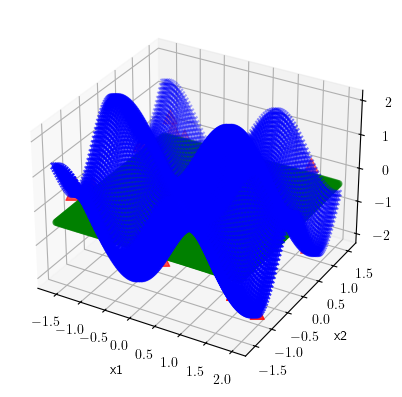

****************************************************************
Epoch 500/2000 Done, Total Loss: 0.016791426809504628
net_outputs_test[0] [ 0.9230156   0.891881    0.85894525 ... -1.8418045  -1.8311255
 -1.8204455 ]
Prediction min: -2.1910453
Prediction max: 1.6770033


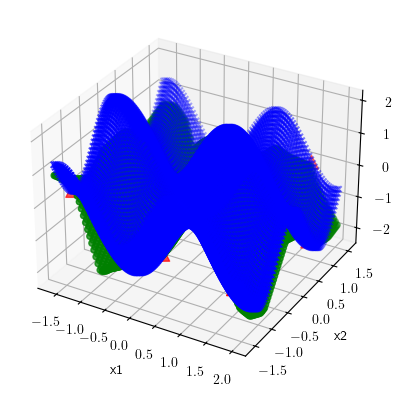

****************************************************************
Epoch 1000/2000 Done, Total Loss: 0.00552020287917306
net_outputs_test[0] [ 0.9496317   0.90431106  0.8589908  ... -2.1960754  -2.1743011
 -2.1510816 ]
Prediction min: -2.3165398
Prediction max: 1.8237092


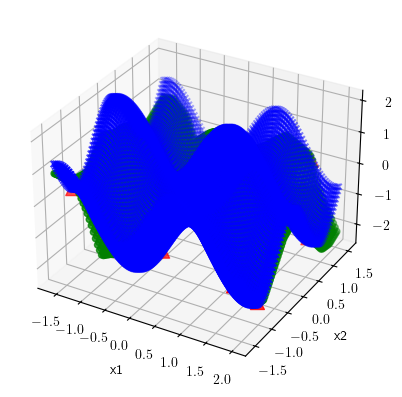

****************************************************************
Epoch 1500/2000 Done, Total Loss: 0.002050474072651317
net_outputs_test[0] [ 0.85071063  0.7935896   0.7364694  ... -2.3777373  -2.3242285
 -2.267502  ]
Prediction min: -2.5732572
Prediction max: 1.7968668


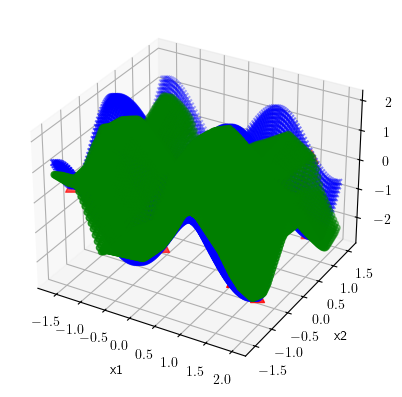

Final Train Accuracy: 100.00%
Final Test Accuracy: 5.92%
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=1, bias=True)
  )
)
net_outputs_test[0] [ 0.835356   0.7773744  0.7193929 ... -2.3352737 -2.3101668 -2.2850606]
Prediction min: -2.475579
Prediction max: 1.7366173


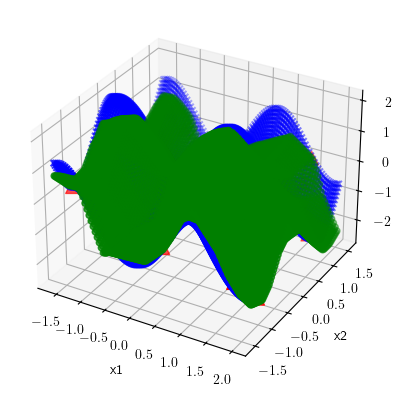

MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=1, bias=True)
  )
)

Final Train Loss: 0.0006
Final Train Accuracy: 100.00%
Final Test Loss: 1.7504
Final Test Accuracy: 5.92%


In [3]:
###############################################Modified Code to 3D#########################################################
##########################################1. 3D no noise no Normalization#####################################################
# Import matplotlib for plotting purposes
import matplotlib
matplotlib.rcParams["text.usetex"] = True
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sometimes, we need Numpy, but wherever possible, we prefer torch.
import numpy as np

# Import PyTorch
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Float (32 bit) or Double (64 bit) precision? Choose!
torch.set_default_dtype(torch.float32)#64)
torch.set_num_threads(4) # Use _maximally_ 4 CPU cores

# This is a list to store the hyperparameters of the training
hyperparam_log = []

#device = torch.device("cpu")
# Choose a device for major calculations (if there is a special GPU card, you usually want that).
# My GPU is not very performant for double precision, so I stay on CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
device = torch.device(device)

# File path for saving the trained NN later.
# If only providing the file name (like here), the file will be generated in the same folder as the Python script
model_file = "mymodel.torch"

## The following script shows a data-driven training of a Neural Network.
## The data is generated in this script, too, by sampling from a function.
## The variables below are used to control this sampling
samples = 48
sample_min = -5
sample_max = 5
sample_span = sample_max - sample_min

## These parameters are usual hyperparameters of the NN and its training.
batch_size = 8 # How many samples shall be presented to the NN, before running another optimizer step?
hidden_dim = 16 # How many neurons shall there be in the hidden layer(s)?
input_dim = 2 # Input dimension of the NN (i.e. how many neurons are in the input layer?)
output_dim = 1 # Some for output

epochs = 2000 # Number of training iterations to be performed
lr = 0.002 # Which learning rate is passed to the training algorithm?

## Choose a criterion to evaluate the results. Here, we choose Mean Square error.
## The term "loss" means about the same as "remaining error" or "residual".
criterion = nn.MSELoss(reduction="mean")

## Here, we create the training data. In this example, we draw samples within the sampling interval and then pass it to
## e.g. the sin function (choose other functions to experiment with this script)
train_x = (sample_span * torch.rand(samples, 2) + sample_min * torch.ones(samples, 2))
train_y = torch.sin(train_x[:, 0]) + torch.cos(train_x[:, 1]) ##torch.pow(test_x, 2)

## Here, we create the test data. To show the effect of extrapolation and the detailed behavior of the NN,
## we choose points a bit outside the interval that we used for sampling training data. Also, we very dense points.
# test_x = torch.zeros(20*samples, 2)
# test_x[:, 0] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])
# test_x[:, 1] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])

# create test_x with meshgrid
grid_size = int(samples ** 0.5) * 2 
margin = 0  # only extend 1. from -5 to 5, extend to -6 to 6 
x1 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x2 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x1, x2 = torch.meshgrid(x1, x2) 
test_x = torch.zeros(2*samples*2*samples, 2)
test_x[:, 0] = x1.reshape(-1)
test_x[:, 1] = x2.reshape(-1)
test_y = torch.sin(test_x[:, 0]) + torch.cos(test_x[:, 1]) ##torch.pow(test_x, 2)

# standardize the data
scaler = StandardScaler()
train_x = torch.tensor(scaler.fit_transform(train_x), dtype=torch.float32)
test_x = torch.tensor(scaler.transform(test_x), dtype=torch.float32)

print ("train_x", train_x)
print ("train_y", train_y)

## We want a DataLoader to handle batching and shuffling of the training data for us.
## The DataLoader needs a TensorDataset, hence we create one from the Training data.
train_data = TensorDataset(train_x, train_y)
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=False)


## This class creates the actual Neural Network.
class MLNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLNet, self).__init__()
        self.hidden_dim = hidden_dim

        ## In this case, I decided to pack the layers into a single container of type nn.Sequential
        ## This container is useful for Fully Connected NNs, where the output of each layer is just fed into the following layer.
        ## added dropout layer, which is a regularization technique to prevent overfitting
        self.fcnn1 = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            #nn.Tanh(),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, hidden_dim),
            #nn.Dropout(p=0.05),  # Dropout layer with 30% of neurons being dropped，but it's not working well，the model underfitting, so change to 0.05
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
        ) ## That network here has exactly 1 hidden layer (comment out some lines or write new ones to add more layers)
        ## nn.Linear is in the pictures represented by the arrows and has the weights (and biases) which are the
        ## parameters of the NN.
        ## nn.ReLU and Tanh are examples for activation functions - in the pictures, these are the bubbles / neurons.
        ## Usually, the pattern is interchanging between one linear layer, one activation function, one linear layer, one activation function and so on

    ## It is required to write a function that is executed when calling the NN model.
    ## Usually, it takes the input data and passes it through the layers.
    ## Here, it is sufficient to call the sequential container since this container does exactly this job.
    ## But this function "forward" could also be used to set up more complex NN architectures with more complex data flows
    def forward(self, x):
        out = self.fcnn1(x)
        return out

## This function performs a test run with the NN.
## It takes the NN model and the test data, passes the test inputs through the network and
## compares it with the target values = test outputs = targets
## and based on that calculates the loss value
def evaluate(model, test_x, test_y):
    ## For testing, we don't need the autograd feature/ protocol of all calculation steps
    ## So, save some time and disable grad tracking.
    with torch.no_grad():
        model.eval() ## Set the NN model into evaluation mode
        outputs = [] ## Create empty lists to store the results
        targets = []
        testlosses = []

        out = model(test_x.to(device)) ## Call the model, i.e. perform the actual inference

        ## Move the output quantities to the CPU, detach them from the tensor operation book-keeping and convert them to numpy arrays/ vectors.
        ## This is all necessary for plotting
        outputs.append(out.cpu().detach().numpy())
        targets.append(test_y.cpu().detach().numpy())
        testlosses.append(criterion(out, test_y.to(device)).item())

    ## Now return that in form of a triple of variables
    return outputs, targets, testlosses

## This calls the evaluate function and takes care of the plotting.
def eval_and_plot(model):
        ## matplotlib tries to be similar to the plot functions of matlab  (admittedly, the commands have to begin with "plt.", but the rest
        ## is quite similar.)
        # create a 3D plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ## Call the network on the test data
        net_outputs_test, targets_test, testlosses = evaluate(model, test_x, test_y)   
        # Plot the targets first in blue (which means to plot the actual function over the whole test interval)
        #ax.plot(test_x[:, 0], test_x[:, 1], targets_test[0], color="-b", label="Target")
        ax.scatter(test_x[:, 0], test_x[:, 1], targets_test[0], c='b', marker='x', label='Target')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('y')

        ## Call the network on the training data
        net_outputs_train, targets_train, testlosses = evaluate(model, train_x, train_y)
        ## First, plot the targets in red, i.e. plot the training data set
        ax.scatter(train_x[:, 0], train_x[:, 1], targets_train[0], c='r', s=100, marker='^', label='Target')

        ## Now, plot the output of the NN on the whole test interval in green
        ## This allows us to see how the NN performs for interpolation as well as for extrapolation
        ax.scatter(test_x[:, 0], test_x[:, 1], net_outputs_test[0].reshape(-1), c='g', marker='o', label='Learned')
        print("net_outputs_test[0]", net_outputs_test[0].reshape(-1))

        print("Prediction min:", net_outputs_test[0].min())
        print("Prediction max:", net_outputs_test[0].max())


        ## All plotting is done, open the plot window
        plt.show()

## This function is the accuracy of the model
def calculate_accuracy(predictions, targets, threshold=0.1):
    """
    Calculate accuracy for regression by checking if predictions are within a certain range of targets.
    Args:
        predictions: Predicted values (torch.Tensor).
        targets: Actual values (torch.Tensor).
        threshold: Acceptable error range for considering a prediction as correct.
    Returns:
        Accuracy as a percentage (float).
    """
    correct = torch.abs(predictions - targets) <= threshold
    accuracy = correct.float().mean().item() * 100
    return accuracy

## That function takes care of the whole training
def train(train_loader, learn_rate, EPOCHS):  # 10):

    # Instantiate the NN
    model = MLNet(input_dim, hidden_dim, output_dim)
    model.to(device) # and move it to the "device" (in case we use a GPU)

    ## Choose an optimizer. Adam is quite robust and thus very popular. Technically, it's based on
    ## gradient descent, but mixes in the gradient of the last time step to improve robustness.
    ## It is given the model parameters, which are the weights and biases of the Linear layers
    ## and the learn_rate. 
    # add L2 regularization(weight_decay) to the optimizer
    #optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=0)
    print("Starting Training of the model")

    # StepLR scheduler: every 'step_size' epochs, lr = lr * gamma
    #scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=500, gamma=0.3)
    #print("Starting Training of the model with StepLR scheduler")

    # We want to keep track of the losses averaged over each epoch, to plot them in those famous
    # decreasing graphs
    avg_losses = torch.zeros(EPOCHS)

    ## In the end, epoch is just another word for "training iteration", so we have a simple for loop.
    for epoch in range(EPOCHS):
        model.train() # Set the model into train mode
        avg_loss = 0. # initializations

        ## DataLoader is iterable so that this for-loop loops over the batches of the training data set
        ## and the DataLoader gives us readily paired combinations of training inputs and targets (which are called x and label, here).
        ## The term "label" is more common in classification, but used for all supervised training tasks
        for x, label in train_loader:
            model.zero_grad() # Important: reset the gradients of the NN before passing the training inputs.
            # Otherwise, we would accumulate the gradient information which might ruin the results
            # or simply run into PyTorch exceptions

            ## Now, we can call the model on the training inputs.
            ## Therefor, we move that data to the device (just in case we use a GPU).
            out = model(x.to(device))
            out = out.squeeze(-1) ## The output is a tensor of shape (batch_size, 1), but we want to have a tensor of shape (batch_size)
            loss = criterion(out, label) # both are [batch_size,1]


            ## Here, the whole magic happens:
            ## PyTorch offers the autograd feature, i.e. calculations on tensors are tracked (there are exceptions, e.g.
            ## this is not possible for in-place operations). This allows to calculate the derivative of each output value
            ## w.r.t. all input values (its "gradient").
            ## In this case, we want to know the derivatives of the loss value w.r.t. all the NN parameters (weights and biases).
            ## Our optimizers are usually based on "Gradient Descent", so we need the gradients...
            loss.backward()
            ## Alright, now let the optimizer do the magic.
            ## We passed the optimizer the NN parameters by reference when we initialized the optimizer.
            ## And the gradient information is stored in the tensors of the parameters, too (not in the loss or so).
            ## That's why the step() function does not require any arguments.
            optimizer.step()

            ## For the plot at the end, save the loss values
            avg_loss += loss.item()

        ## It's an average loss, so divide by the number of samples/ size of the training data set
        avg_losses[epoch] = avg_loss / len(train_loader)

        ## StepLR scheduler step, update learning rate, every 500 epochs reduce lr by 0.3
    #    scheduler.step()

        ## To understand how the NN learns, all 500 epochs a plot is shown (Close the plot window and wait for the next plot)
        if epoch%500 == 0:
            print("****************************************************************")
            print("Epoch {}/{} Done, Total Loss: {}".format(epoch, EPOCHS, avg_loss / len(train_loader)))
            eval_and_plot(model)
    #       current_lr = scheduler.get_last_lr()[0]
    #       print(f"Current LR after scheduler step: {current_lr}")

    # Evaluate train accuracy
    with torch.no_grad():
        model.eval()
        train_out = model(train_x.to(device)).squeeze(-1)
        train_accuracy = calculate_accuracy(train_out, train_y.to(device))
        print(f"Final Train Accuracy: {train_accuracy:.2f}%")

    # Evaluate test accuracy
    test_outputs, test_targets, _ = evaluate(model, test_x, test_y)
    test_accuracy = calculate_accuracy(torch.tensor(test_outputs[0]), torch.tensor(test_targets[0]))
    print(f"Final Test Accuracy: {test_accuracy:.2f}%")


    ## Now save the trained model with all its properties to the model_file
    torch.save(model, model_file)

    ## And return the model in case we want to use it for other tasks
    return model


## As the functions written before are just function definitions,
## those functions still have to be called.
## This is done here.
## Train the model
model = train(train_loader, lr, epochs)

print(model)

## Test that saving the model worked: load it from file
model = torch.load(model_file)
## and evaluate and plot once
eval_and_plot(model)

print(model)

# Evaluate and print train loss and accuracy
with torch.no_grad():
    model.eval()
    # Calculate Train Loss
    train_out = model(train_x.to(device)).squeeze(-1)
    final_train_loss = criterion(train_out, train_y.to(device)).item()

    # Calculate Train Accuracy
    train_accuracy = calculate_accuracy(train_out, train_y.to(device))
    print(f"\nFinal Train Loss: {final_train_loss:.4f}")
    print(f"Final Train Accuracy: {train_accuracy:.2f}%")

# Evaluate and print test loss and accuracy
test_outputs, test_targets, test_loss = evaluate(model, test_x, test_y)
final_test_loss = test_loss[0]  # Since test_loss is a list, take the first value

# Convert outputs to tensors for accuracy calculation
test_predictions = torch.tensor(test_outputs[0])
test_targets = torch.tensor(test_targets[0])

# Calculate Test Accuracy
test_accuracy = calculate_accuracy(test_predictions, test_targets)

print(f"Final Test Loss: {final_test_loss:.4f}")
print(f"Final Test Accuracy: {test_accuracy:.2f}%")


Using cpu device

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=1600
Epoch 1599/1600, Loss=0.0861
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)
lr=0.001, hidden_dim=16, batch_size=8, epochs=1600

Final Train loss: 0.0857, Test loss: 1.8020 **

net_outputs_test[0] [0.95887095 1.0810016  1.203132   ... 0.5257652  0.49117452 0.4250775 ]
Prediction min: -2.6056125
Prediction max: 2.937923


/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1024])) that is different to the input size (torch.Size([1024, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


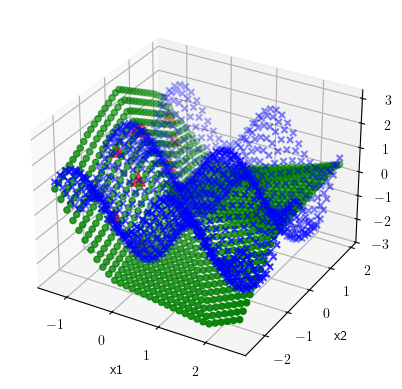

************************************************************************

**Running training with lr=0.002, hidden_dim=16, batch_size=8, epochs=1600
Epoch 1599/1600, Loss=0.0193
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)
lr=0.002, hidden_dim=16, batch_size=8, epochs=1600

Final Train loss: 0.0192, Test loss: 2.2945 **

net_outputs_test[0] [0.73862547 0.9151028  1.1061295  ... 0.5232546  0.71988094 0.9165072 ]
Prediction min: -4.0232983
Prediction max: 2.810775


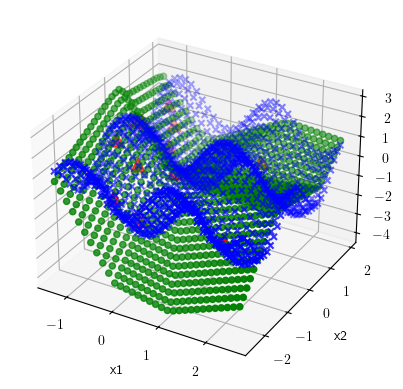

************************************************************************

**Running training with lr=0.002, hidden_dim=32, batch_size=8, epochs=1600
Epoch 1599/1600, Loss=0.0006
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=1, bias=True)
  )
)
lr=0.002, hidden_dim=32, batch_size=8, epochs=1600

Final Train loss: 0.0006, Test loss: 1.9407 **

net_outputs_test[0] [0.16458286 0.3540581  0.53613955 ... 1.7064319  1.9887819  2.2451897 ]
Prediction min: -3.4062834
Prediction max: 2.4247816


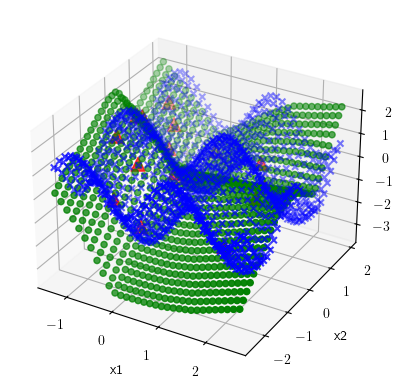

************************************************************************

**Running training with lr=0.002, hidden_dim=16, batch_size=8, epochs=2000
Epoch 1999/2000, Loss=0.0052
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)
lr=0.002, hidden_dim=16, batch_size=8, epochs=2000

Final Train loss: 0.0051, Test loss: 1.7825 **

net_outputs_test[0] [0.7124534 0.818624  0.9385523 ... 1.1138908 1.3080696 1.5022488]
Prediction min: -3.0464902
Prediction max: 2.8731256


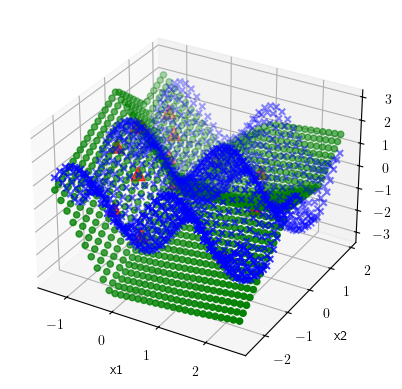

************************************************************************

**Running training with lr=0.003, hidden_dim=16, batch_size=8, epochs=1600
Epoch 1599/1600, Loss=0.0145
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)
lr=0.003, hidden_dim=16, batch_size=8, epochs=1600

Final Train loss: 0.0144, Test loss: 1.8653 **

net_outputs_test[0] [ 0.20669751  0.38738886  0.56807995 ... -0.05527671 -0.01372837
  0.02781925]
Prediction min: -3.2752254
Prediction max: 2.9673245


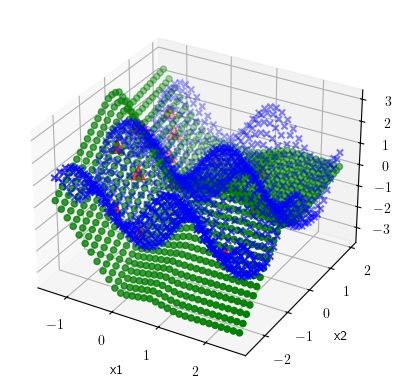

************************************************************************

**Running training with lr=0.003, hidden_dim=32, batch_size=8, epochs=1600
Epoch 1599/1600, Loss=0.0000
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=1, bias=True)
  )
)
lr=0.003, hidden_dim=32, batch_size=8, epochs=1600

Final Train loss: 0.0000, Test loss: 2.1882 **

net_outputs_test[0] [-0.1871906   0.00980584  0.20680124 ...  0.956433    1.0466224
  1.0952988 ]
Prediction min: -3.994238
Prediction max: 2.3289323


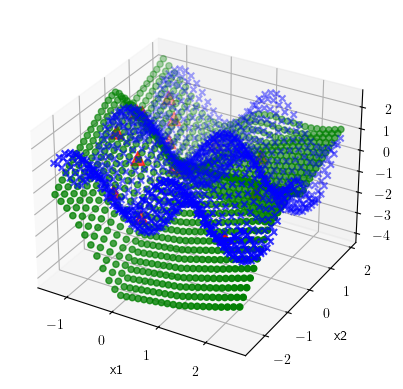

************************************************************************

**Running training with lr=0.003, hidden_dim=32, batch_size=8, epochs=2000
Epoch 1999/2000, Loss=0.0030
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=1, bias=True)
  )
)
lr=0.003, hidden_dim=32, batch_size=8, epochs=2000

Final Train loss: 0.0002, Test loss: 1.8117 **

net_outputs_test[0] [-0.53903675 -0.34939182 -0.10161646 ...  0.37607634  0.49615657
  0.61623687]
Prediction min: -3.2989094
Prediction max: 2.2438977


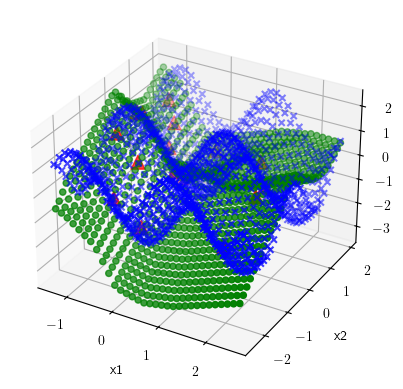

************************************************************************


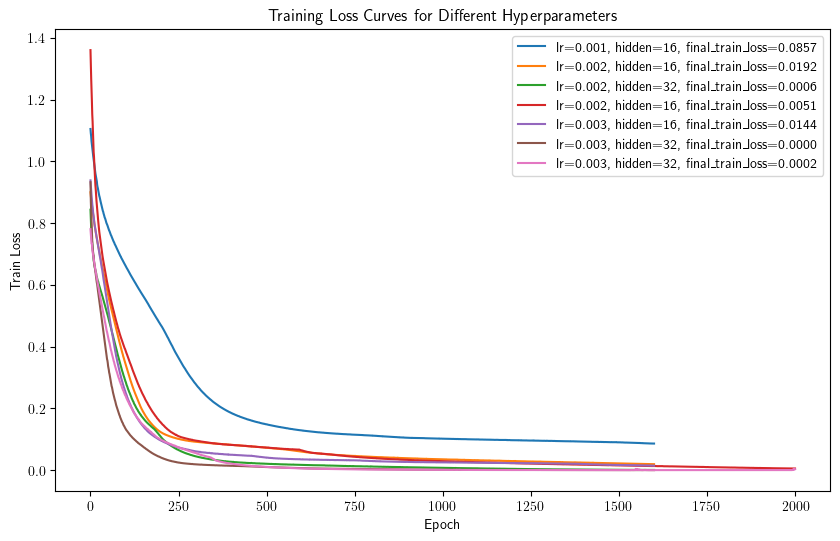


Comparison of final results:
Config: lr=0.001, hidden_dim=16, epoch=1600 => Train Loss=0.0857, Test Loss=1.8020
Config: lr=0.002, hidden_dim=16, epoch=1600 => Train Loss=0.0192, Test Loss=2.2945
Config: lr=0.002, hidden_dim=32, epoch=1600 => Train Loss=0.0006, Test Loss=1.9407
Config: lr=0.002, hidden_dim=16, epoch=2000 => Train Loss=0.0051, Test Loss=1.7825
Config: lr=0.003, hidden_dim=16, epoch=1600 => Train Loss=0.0144, Test Loss=1.8653
Config: lr=0.003, hidden_dim=32, epoch=1600 => Train Loss=0.0000, Test Loss=2.1882
Config: lr=0.003, hidden_dim=32, epoch=2000 => Train Loss=0.0002, Test Loss=1.8117


In [123]:
###############################################Modified Code to 3D#########################################################
##########################################2. with difference Hyperparameters#####################################################
# Import matplotlib for plotting purposes
import matplotlib
matplotlib.rcParams["text.usetex"] = True
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sometimes, we need Numpy, but wherever possible, we prefer torch.
import numpy as np

# Import PyTorch
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Float (32 bit) or Double (64 bit) precision? Choose!
torch.set_default_dtype(torch.float32)#64)
torch.set_num_threads(4) # Use _maximally_ 4 CPU cores

# This is a list to store the losses of the different hyperparameter configurations
train_losses_all = []
test_losses_all = []
models = []

# This is a list to store the hyperparameters of the training
# hyperparam_log = []

#device = torch.device("cpu")
# Choose a device for major calculations (if there is a special GPU card, you usually want that).
# My GPU is not very performant for double precision, so I stay on CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
device = torch.device(device)

# File path for saving the trained NN later.
# If only providing the file name (like here), the file will be generated in the same folder as the Python script
model_file = "mymodel.torch"

## The following script shows a data-driven training of a Neural Network.
## The data is generated in this script, too, by sampling from a function.
## The variables below are used to control this sampling
samples = 16
sample_min = -5
sample_max = 5
sample_span = sample_max - sample_min

## These parameters are usual hyperparameters of the NN and its training.
# batch_size = 8 # How many samples shall be presented to the NN, before running another optimizer step?
# hidden_dim = 16 # How many neurons shall there be in the hidden layer(s)?
input_dim = 2 # Input dimension of the NN (i.e. how many neurons are in the input layer?)
output_dim = 1 # Some for output

epochs = 2000 # Number of training iterations to be performed
lr = 0.002 # Which learning rate is passed to the training algorithm?

## Choose a criterion to evaluate the results. Here, we choose Mean Square error.
## The term "loss" means about the same as "remaining error" or "residual".
criterion = nn.MSELoss(reduction="mean")

## Here, we create the training data. In this example, we draw samples within the sampling interval and then pass it to
## e.g. the sin function (choose other functions to experiment with this script)
train_x = (sample_span * torch.rand(samples, 2) + sample_min * torch.ones(samples, 2))
train_y = torch.sin(train_x[:, 0]) + torch.cos(train_x[:, 1]) ##torch.pow(test_x, 2)

## This function logs the hyperparameters of the training
def log_hyperparameters(config, train_loss, test_loss, train_losses):
    hyperparam_log.append({
        "learning_rate": config["lr"],
        "hidden_dim": config["hidden_dim"],
        "batch_size": config["batch_size"],
        "epochs": config["epochs"],
        "final_train_loss": train_loss,
        "final_test_loss": test_loss,
        "train_losses": train_losses  # Include train_losses here
    })

# print ("train_x", train_x)
# print ("train_y", train_y)

## Here, we create the test data. To show the effect of extrapolation and the detailed behavior of the NN,
## we choose points a bit outside the interval that we used for sampling training data. Also, we very dense points.
# test_x = torch.zeros(20*samples, 2)
# test_x[:, 0] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])
# test_x[:, 1] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])

# create test_x with meshgrid
grid_size = int(samples ** 0.5) * 2 
margin = 1  # only extend 1. from -5 to 5, extend to -6 to 6 
x1 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x2 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x1, x2 = torch.meshgrid(x1, x2) 
test_x = torch.zeros(2*samples*2*samples, 2)
test_x[:, 0] = x1.reshape(-1)
test_x[:, 1] = x2.reshape(-1)
test_y = torch.sin(test_x[:, 0]) + torch.cos(test_x[:, 1]) ##torch.pow(test_x, 2)

# standardize the data
scaler = StandardScaler()
train_x = torch.tensor(scaler.fit_transform(train_x), dtype=torch.float32)
test_x = torch.tensor(scaler.transform(test_x), dtype=torch.float32)

## We want a DataLoader to handle batching and shuffling of the training data for us.
## The DataLoader needs a TensorDataset, hence we create one from the Training data.
train_data = TensorDataset(train_x, train_y)
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=False)


## This class creates the actual Neural Network.
class MLNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLNet, self).__init__()
        self.hidden_dim = hidden_dim

        ## In this case, I decided to pack the layers into a single container of type nn.Sequential
        ## This container is useful for Fully Connected NNs, where the output of each layer is just fed into the following layer.
        ## added dropout layer, which is a regularization technique to prevent overfitting
        self.fcnn1 = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            #nn.Tanh(),
            nn.ReLU(),
            #nn.Linear(hidden_dim, hidden_dim),
            #nn.ReLU(),
            #nn.Linear(hidden_dim, hidden_dim),
            #nn.Dropout(p=0.05),  # Dropout layer with 30% of neurons being dropped，but it's not working well，the model underfitting, so change to 0.05
            #nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
        ) ## That network here has exactly 1 hidden layer (comment out some lines or write new ones to add more layers)
        ## nn.Linear is in the pictures represented by the arrows and has the weights (and biases) which are the
        ## parameters of the NN.
        ## nn.ReLU and Tanh are examples for activation functions - in the pictures, these are the bubbles / neurons.
        ## Usually, the pattern is interchanging between one linear layer, one activation function, one linear layer, one activation function and so on

    ## It is required to write a function that is executed when calling the NN model.
    ## Usually, it takes the input data and passes it through the layers.
    ## Here, it is sufficient to call the sequential container since this container does exactly this job.
    ## But this function "forward" could also be used to set up more complex NN architectures with more complex data flows
    def forward(self, x):
        out = self.fcnn1(x)
        return out

## This function performs a test run with the NN.
## It takes the NN model and the test data, passes the test inputs through the network and
## compares it with the target values = test outputs = targets
## and based on that calculates the loss value
def evaluate(model, test_x, test_y):
    ## For testing, we don't need the autograd feature/ protocol of all calculation steps
    ## So, save some time and disable grad tracking.
    with torch.no_grad():
        model.eval() ## Set the NN model into evaluation mode
        outputs = [] ## Create empty lists to store the results
        targets = []
        testlosses = []

        out = model(test_x.to(device)) ## Call the model, i.e. perform the actual inference

        ## Move the output quantities to the CPU, detach them from the tensor operation book-keeping and convert them to numpy arrays/ vectors.
        ## This is all necessary for plotting
        outputs.append(out.cpu().detach().numpy())
        targets.append(test_y.cpu().detach().numpy())
        testlosses.append(criterion(out, test_y.to(device)).item())

    ## Now return that in form of a triple of variables
    return outputs, targets, testlosses

## This calls the evaluate function and takes care of the plotting.
def eval_and_plot(model):
        ## matplotlib tries to be similar to the plot functions of matlab  (admittedly, the commands have to begin with "plt.", but the rest
        ## is quite similar.)

        # create a 3D plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ## Call the network on the test data
        net_outputs_test, targets_test, testlosses = evaluate(model, test_x, test_y)   
        # Plot the targets first in blue (which means to plot the actual function over the whole test interval)
        #ax.plot(test_x[:, 0], test_x[:, 1], targets_test[0], color="-b", label="Target")
        ax.scatter(test_x[:, 0], test_x[:, 1], targets_test[0], c='b', marker='x', label='Target')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('y')

        ## Call the network on the training data
        net_outputs_train, targets_train, testlosses = evaluate(model, train_x, train_y)
        ## First, plot the targets in red, i.e. plot the training data set
        ax.scatter(train_x[:, 0], train_x[:, 1], targets_train[0], c='r', s=100, marker='^', label='Target')

        ## Now, plot the output of the NN on the whole test interval in green
        ## This allows us to see how the NN performs for interpolation as well as for extrapolation
        ax.scatter(test_x[:, 0], test_x[:, 1], net_outputs_test[0].reshape(-1), c='g', marker='o', label='Learned')
        print("net_outputs_test[0]", net_outputs_test[0].reshape(-1))

        print("Prediction min:", net_outputs_test[0].min())
        print("Prediction max:", net_outputs_test[0].max())


        ## All plotting is done, open the plot window
        plt.show()

## This function takes care of the whole training
def train(train_loader, lr_run, hidden_dim_run, EPOCHS):
    model = MLNet(input_dim, hidden_dim_run, output_dim).to(device)  # 
    optimizer = torch.optim.Adam(model.parameters(), lr=lr_run, weight_decay=0)
    # print(f"Starting Training of the model with lr={lr_run}, hidden_dim={hidden_dim_run}, epochs={EPOCHS}")

    avg_losses = torch.zeros(EPOCHS)

    for epoch in range(EPOCHS):
        model.train()
        avg_loss = 0.
        counter = 0
        for x, label in train_loader:
            counter += 1
            model.zero_grad()
            out = model(x.to(device)).squeeze(-1)
            loss = criterion(out, label.to(device))
            loss.backward()
            optimizer.step()
            avg_loss += loss.item()
        avg_losses[epoch] = avg_loss / len(train_loader)

    # after training, evaluate the traing and test loss
    final_train_loss = avg_losses[-1].item()
    with torch.no_grad():
        model.eval()
        out_train = model(train_x.to(device)).squeeze(-1)
        final_train_loss = criterion(out_train, train_y.to(device)).item()

        out_test = model(test_x.to(device)).squeeze(-1)
        final_test_loss = criterion(out_test, test_y.to(device)).item()
    
    # plot the loss curve
    if epoch == EPOCHS-1:
        print(f"Epoch {epoch}/{EPOCHS}, Loss={avg_losses[epoch].item():.4f}")
        #eval_and_plot(model)

    # return the trained model, the average losses, and the final training and test loss
    return model, avg_losses.cpu().tolist(), final_train_loss, final_test_loss


## As the functions written before are just function definitions,
## those functions still have to be called.
## This is done here.
## Train the model
# model = train(train_loader, lr, epochs)


## Test that saving the model worked: load it from file
# model = torch.load(model_file)
## and evaluate and plot once
# eval_and_plot(model)

###################### Hyperparameter Search Loop ######################
hyperparam_log = []  # reset hyperparam_log

hyperparam_configs = [
    {"lr":0.001, "hidden_dim":16, "batch_size":8, "epochs":1600},
    {"lr":0.002, "hidden_dim":16, "batch_size":8, "epochs":1600},
    {"lr":0.002, "hidden_dim":32, "batch_size":8, "epochs":1600},
    {"lr":0.002, "hidden_dim":16, "batch_size":8, "epochs":2000},
    {"lr":0.003, "hidden_dim":16, "batch_size":8, "epochs":1600},
    {"lr":0.003, "hidden_dim":32, "batch_size":8, "epochs":1600},
    {"lr":0.003, "hidden_dim":32, "batch_size":8, "epochs":2000},
]

for config in hyperparam_configs:
    lr_run          = config["lr"]
    hidden_dim_run  = config["hidden_dim"]
    batch_size_run  = config["batch_size"]
    epochs_run      = config["epochs"]

    # update hyperparameters to be global variables
    lr         = lr_run
    hidden_dim = hidden_dim_run
    batch_size = batch_size_run
    epochs     = epochs_run

    print(f"\n**Running training with lr={lr}, hidden_dim={hidden_dim}, batch_size={batch_size}, epochs={epochs}")

    # train the model to get the results
    model, train_curve, final_train_loss, final_test_loss = train(train_loader, lr, hidden_dim, epochs)

    # show the model structure
    print(model)

    # save to hyperparam_log
    log_hyperparameters(config, final_train_loss, final_test_loss, train_curve)
    
    print(f"lr={lr}, hidden_dim={hidden_dim}, batch_size={batch_size}, epochs={epochs}\n")
    print(f"Final Train loss: {final_train_loss:.4f}, Test loss: {final_test_loss:.4f} **\n")
    eval_and_plot(model)  # plot the training results
    print("************************************************************************")

###################### Plot multiple curves ######################
plt.figure(figsize=(10,6))
for entry in hyperparam_log:
    plt.plot(entry["train_losses"],
             label=f"lr={entry['learning_rate']}, hidden={entry['hidden_dim']}, final_train_loss={entry['final_train_loss']:.4f}")
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("Training Loss Curves for Different Hyperparameters")
plt.legend()
plt.show()

###################### Compare final results ######################
print("\nComparison of final results:")
for entry in hyperparam_log:
    print(f"Config: lr={entry['learning_rate']}, hidden_dim={entry['hidden_dim']}, epoch={entry['epochs']} => Train Loss={entry['final_train_loss']:.4f}, Test Loss={entry['final_test_loss']:.4f}")


## This function is used to plot the hyperparameter logs
#plot_hyperparameter_logs()

Using cpu device

**Running training with lr=0.0001, hidden_dim=16, batch_size=8, epochs=1000
Epoch 999/1000, Loss=0.5725
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)


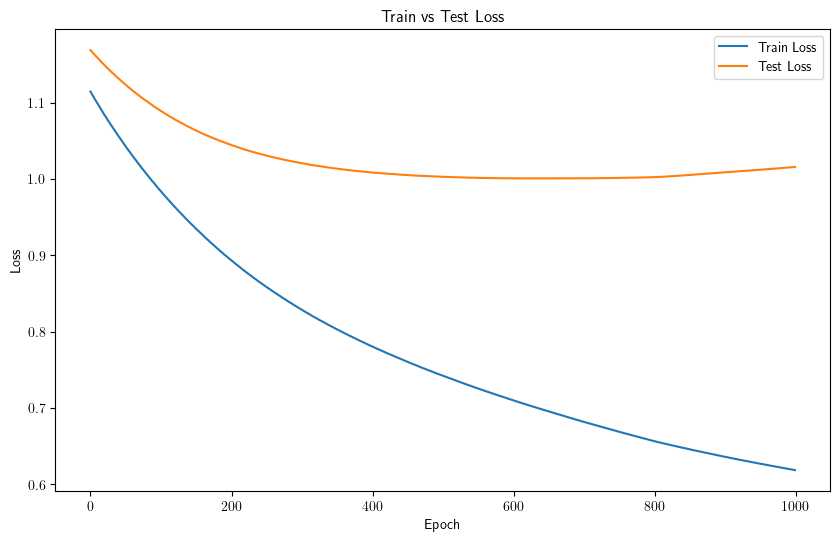

lr=0.0001, hidden_dim=16, batch_size=8, epochs=1000

Final Train loss: 0.5724, Test loss: 1.0638 **

net_outputs_test[0] [-0.22800614 -0.2208957  -0.21061145 ... -0.29049268 -0.29932863
 -0.30816445]
Prediction min: -0.47541583
Prediction max: 0.032198407


/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1024])) that is different to the input size (torch.Size([1024, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


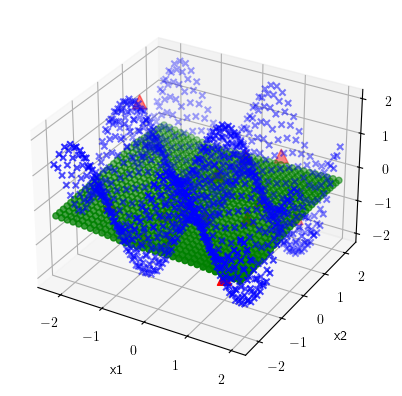

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=1000
Epoch 999/1000, Loss=0.1409
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)


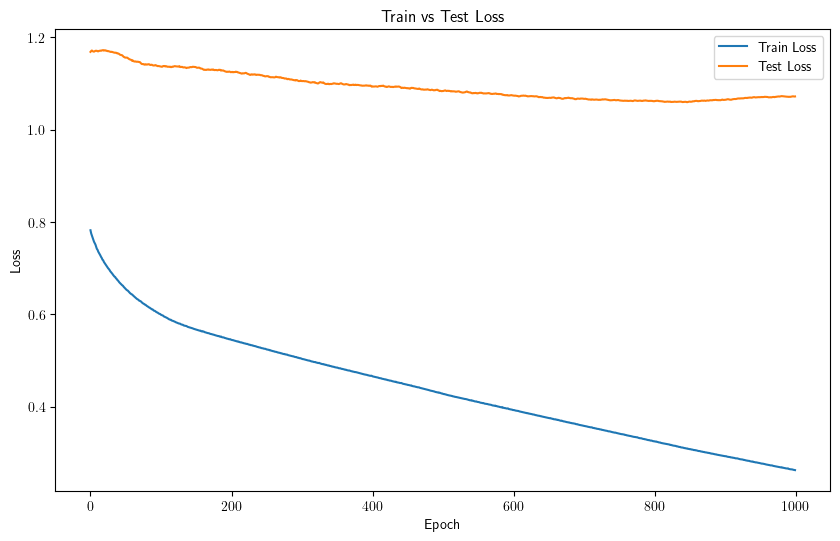

lr=0.001, hidden_dim=16, batch_size=8, epochs=1000

Final Train loss: 0.1404, Test loss: 1.0540 **

net_outputs_test[0] [ 0.65191025  0.6667518   0.68159354 ... -0.5297325  -0.5015636
 -0.47021914]
Prediction min: -1.6161901
Prediction max: 1.8516821


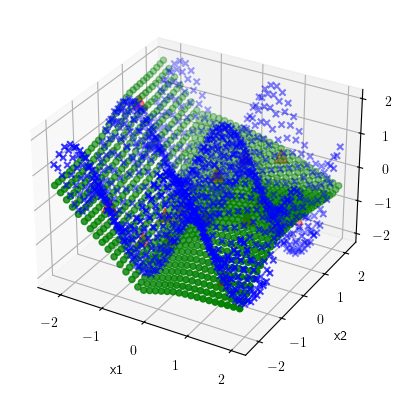

************************************************************************

**Running training with lr=0.001, hidden_dim=16, batch_size=4, epochs=1000
Epoch 999/1000, Loss=0.1379
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)


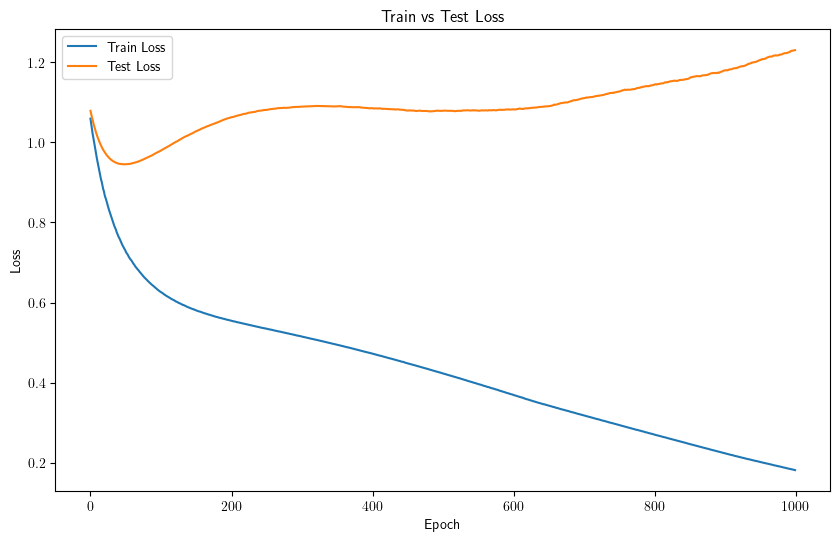

lr=0.001, hidden_dim=16, batch_size=4, epochs=1000

Final Train loss: 0.1376, Test loss: 1.0599 **

net_outputs_test[0] [ 0.7055644  0.6725366  0.6395086 ... -1.037151  -0.9068593 -0.7669767]
Prediction min: -1.9478167
Prediction max: 3.4589593


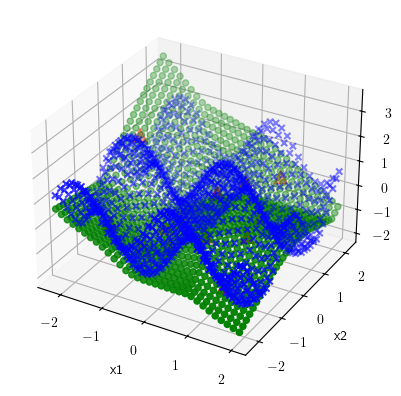

************************************************************************

**Running training with lr=0.02, hidden_dim=16, batch_size=8, epochs=1000
Epoch 999/1000, Loss=0.0370
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)


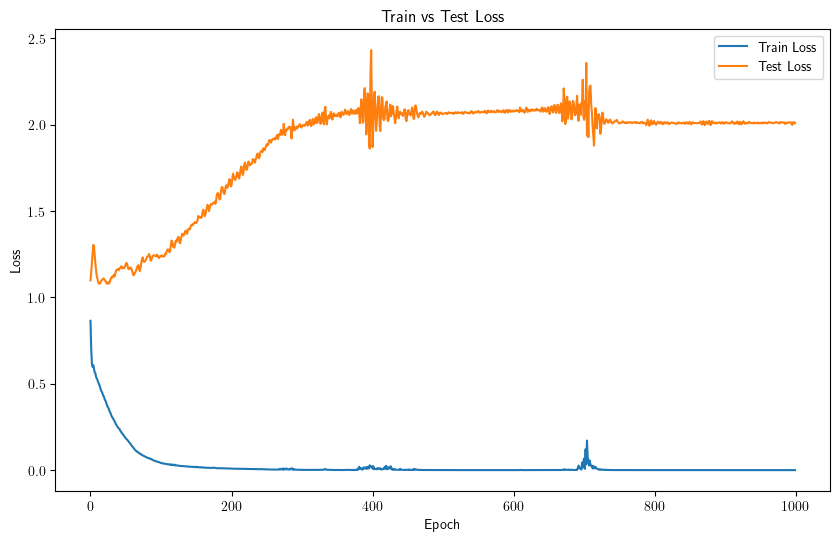

lr=0.02, hidden_dim=16, batch_size=8, epochs=1000

Final Train loss: 0.0392, Test loss: 3.3077 **

net_outputs_test[0] [ 3.161806   3.2968674  3.431929  ... -3.3474293 -3.4211721 -3.4949155]
Prediction min: -4.493106
Prediction max: 4.2422967


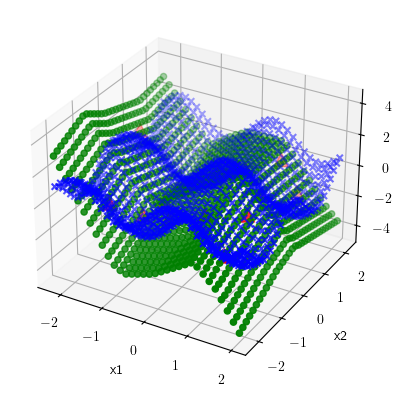

************************************************************************

**Running training with lr=0.002, hidden_dim=32, batch_size=8, epochs=1000
Epoch 999/1000, Loss=0.0142
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=1, bias=True)
  )
)


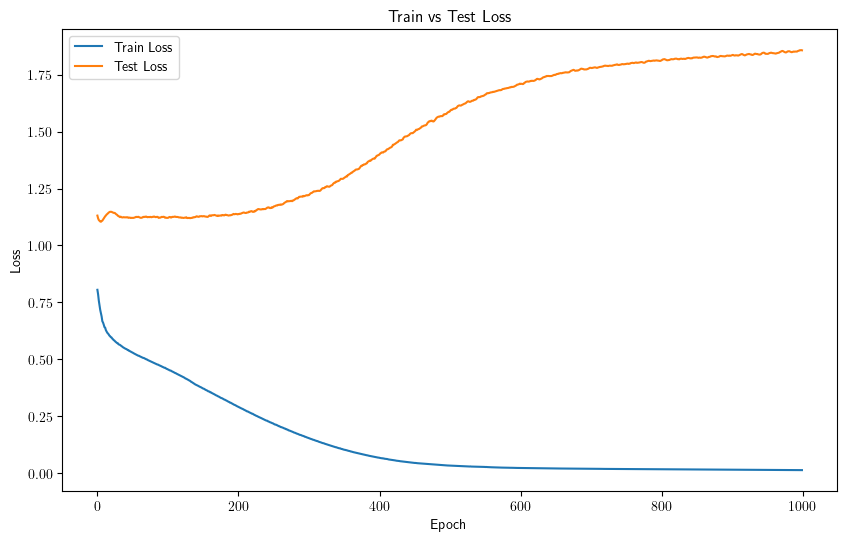

lr=0.002, hidden_dim=32, batch_size=8, epochs=1000

Final Train loss: 0.0142, Test loss: 2.0267 **

net_outputs_test[0] [ 2.0810068  2.0568125  2.0326188 ... -2.9191604 -2.7920187 -2.6648774]
Prediction min: -2.9916139
Prediction max: 5.195997


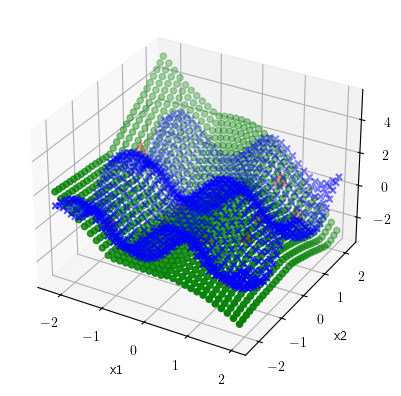

************************************************************************

**Running training with lr=0.002, hidden_dim=16, batch_size=8, epochs=1500
Epoch 1499/1500, Loss=0.0180
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)


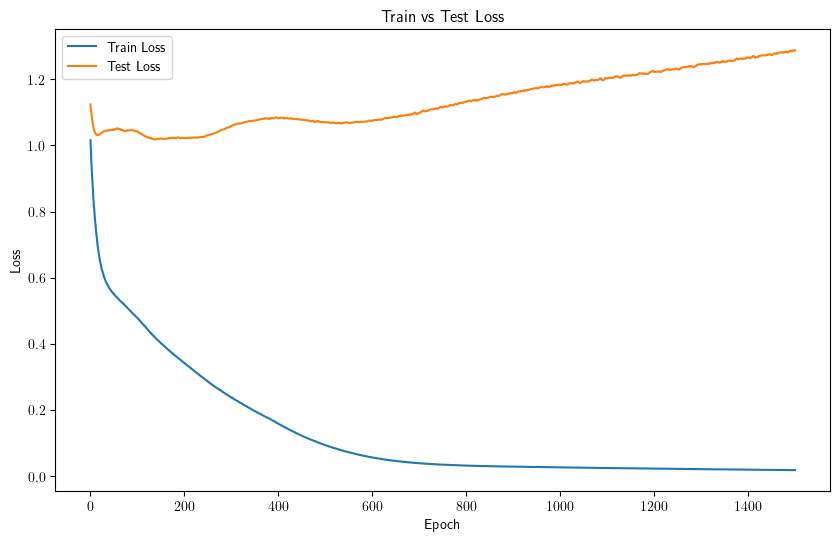

lr=0.002, hidden_dim=16, batch_size=8, epochs=1500

Final Train loss: 0.0179, Test loss: 1.4085 **

net_outputs_test[0] [ 2.5979915  2.580409   2.5628269 ... -3.070222  -3.0570788 -3.049668 ]
Prediction min: -3.070222
Prediction max: 3.2366676


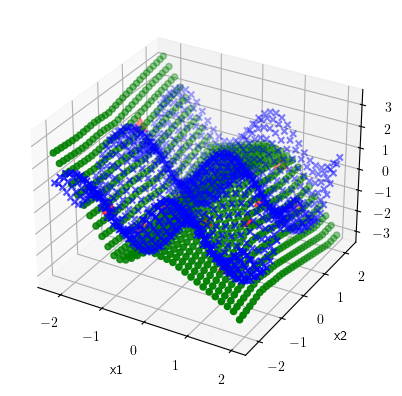

************************************************************************

**Running training with lr=0.003, hidden_dim=16, batch_size=8, epochs=1000
Epoch 999/1000, Loss=0.0020
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=1, bias=True)
  )
)


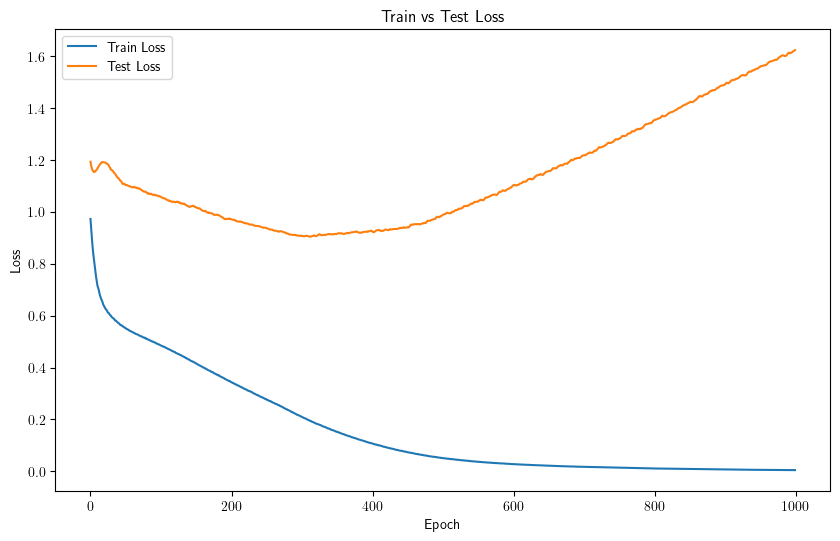

lr=0.003, hidden_dim=16, batch_size=8, epochs=1000

Final Train loss: 0.0020, Test loss: 1.6198 **

net_outputs_test[0] [ 2.3423383  2.3327875  2.323238  ... -2.6739166 -2.524259  -2.3746014]
Prediction min: -2.8552818
Prediction max: 5.09731


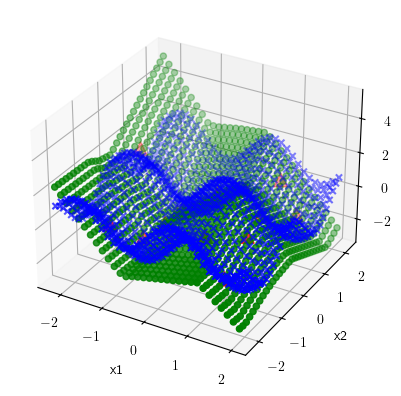

************************************************************************

**Running training with lr=0.003, hidden_dim=32, batch_size=8, epochs=1000
Epoch 999/1000, Loss=0.0009
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=1, bias=True)
  )
)


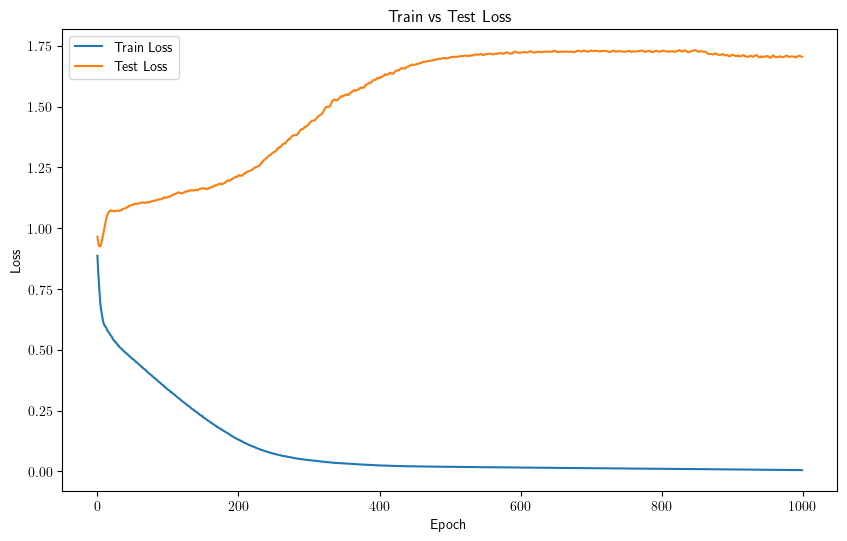

lr=0.003, hidden_dim=32, batch_size=8, epochs=1000

Final Train loss: 0.0009, Test loss: 1.8186 **

net_outputs_test[0] [ 2.3362255  2.25204    2.1660118 ... -2.9236927 -2.8001742 -2.6074672]
Prediction min: -2.9236927
Prediction max: 5.2227097


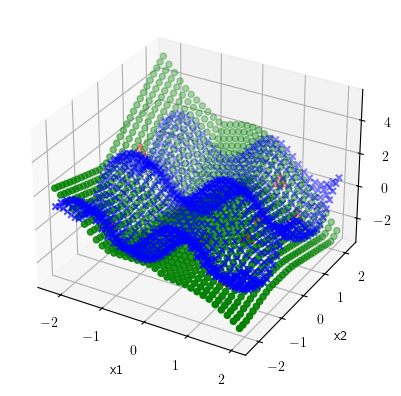

************************************************************************

**Running training with lr=0.003, hidden_dim=32, batch_size=8, epochs=1500
Epoch 1499/1500, Loss=0.0004
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=1, bias=True)
  )
)


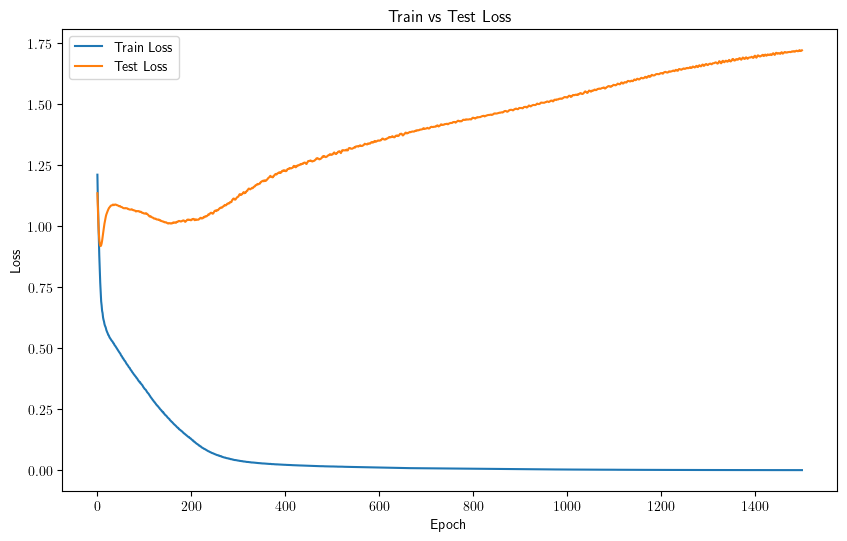

lr=0.003, hidden_dim=32, batch_size=8, epochs=1500

Final Train loss: 0.0004, Test loss: 1.5923 **

net_outputs_test[0] [ 3.1639552  3.2129269  3.2618992 ... -3.4731784 -3.4666142 -3.4584322]
Prediction min: -3.4863079
Prediction max: 3.6948218


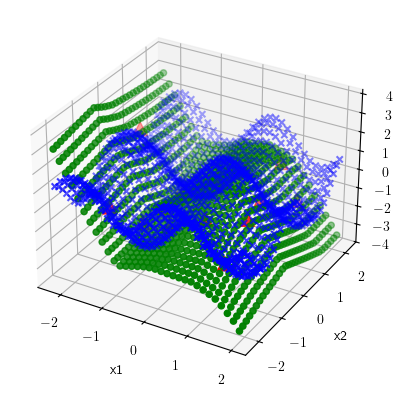

************************************************************************


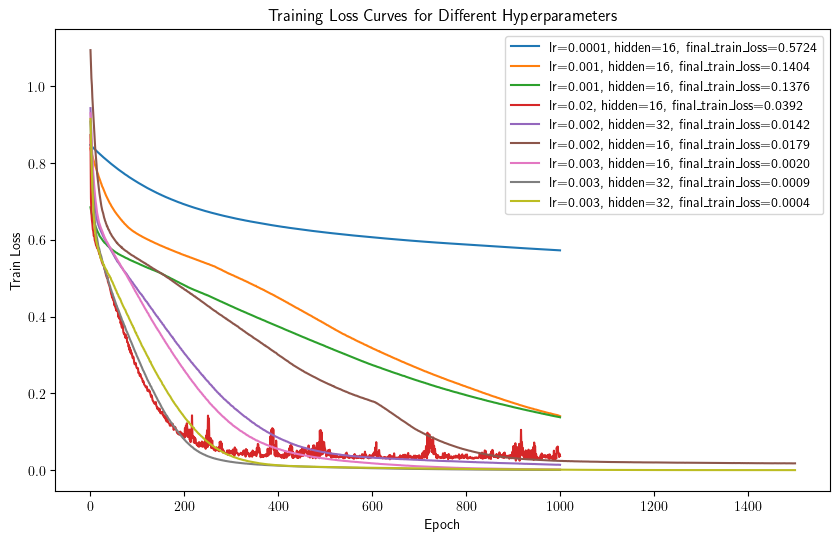


Comparison of final results:


KeyError: 'train_accuracies'

In [125]:
###############################################Modified Code to 3D#########################################################
#############################3. different Hyperparameters with noise without normalization test loss#####################################################
# Import matplotlib for plotting purposes
import matplotlib
matplotlib.rcParams["text.usetex"] = True
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sometimes, we need Numpy, but wherever possible, we prefer torch.
import numpy as np

# Import PyTorch
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Float (32 bit) or Double (64 bit) precision? Choose!
torch.set_default_dtype(torch.float32)#64)
torch.set_num_threads(4) # Use _maximally_ 4 CPU cores

# This is a list to store the losses of the different hyperparameter configurations
train_losses_all = []
test_losses_all = []
models = []

# This is a list to store the hyperparameters of the training
# hyperparam_log = []

#device = torch.device("cpu")
# Choose a device for major calculations (if there is a special GPU card, you usually want that).
# My GPU is not very performant for double precision, so I stay on CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
device = torch.device(device)

# File path for saving the trained NN later.
# If only providing the file name (like here), the file will be generated in the same folder as the Python script
model_file = "mymodel.torch"

## The following script shows a data-driven training of a Neural Network.
## The data is generated in this script, too, by sampling from a function.
## The variables below are used to control this sampling
samples = 16
sample_min = -5
sample_max = 5
sample_span = sample_max - sample_min

## These parameters are usual hyperparameters of the NN and its training.
# batch_size = 8 # How many samples shall be presented to the NN, before running another optimizer step?
# hidden_dim = 16 # How many neurons shall there be in the hidden layer(s)?
input_dim = 2 # Input dimension of the NN (i.e. how many neurons are in the input layer?)
output_dim = 1 # Some for output

epochs = 2000 # Number of training iterations to be performed
lr = 0.002 # Which learning rate is passed to the training algorithm?

## Choose a criterion to evaluate the results. Here, we choose Mean Square error.
## The term "loss" means about the same as "remaining error" or "residual".
criterion = nn.MSELoss(reduction="mean")

## Here, we create the training data. In this example, we draw samples within the sampling interval and then pass it to
## e.g. the sin function (choose other functions to experiment with this script)
train_x = (sample_span * torch.rand(samples, 2) + sample_min * torch.ones(samples, 2))
train_y = torch.sin(train_x[:, 0]) + torch.cos(train_x[:, 1]) ##torch.pow(test_x, 2)


# add noise to the training data
noise_level = 0.3  # noise level
train_y += noise_level * torch.randn_like(train_y)

## This function logs the hyperparameters of the training
def log_hyperparameters(config, train_loss, test_loss, train_losses):
    hyperparam_log.append({
        "learning_rate": config["lr"],
        "hidden_dim": config["hidden_dim"],
        "batch_size": config["batch_size"],
        "epochs": config["epochs"],
        "final_train_loss": train_loss,
        "final_test_loss": test_loss,
        "train_losses": train_losses  # Include train_losses here
    })

# print ("train_x", train_x)
# print ("train_y", train_y)

## Here, we create the test data. To show the effect of extrapolation and the detailed behavior of the NN,
## we choose points a bit outside the interval that we used for sampling training data. Also, we very dense points.
# test_x = torch.zeros(20*samples, 2)
# test_x[:, 0] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])
# test_x[:, 1] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])

# create test_x with meshgrid
grid_size = int(samples ** 0.5) * 2 
margin = 1  # only extend 1. from -5 to 5, extend to -6 to 6 
x1 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x2 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x1, x2 = torch.meshgrid(x1, x2) 
test_x = torch.zeros(2*samples*2*samples, 2)
test_x[:, 0] = x1.reshape(-1)
test_x[:, 1] = x2.reshape(-1)
test_y = torch.sin(test_x[:, 0]) + torch.cos(test_x[:, 1]) ##torch.pow(test_x, 2)

# standardize the data
scaler = StandardScaler()
train_x = torch.tensor(scaler.fit_transform(train_x), dtype=torch.float32)
test_x = torch.tensor(scaler.transform(test_x), dtype=torch.float32)

## We want a DataLoader to handle batching and shuffling of the training data for us.
## The DataLoader needs a TensorDataset, hence we create one from the Training data.
train_data = TensorDataset(train_x, train_y)
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=False)


## This class creates the actual Neural Network.
class MLNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLNet, self).__init__()
        self.hidden_dim = hidden_dim

        ## In this case, I decided to pack the layers into a single container of type nn.Sequential
        ## This container is useful for Fully Connected NNs, where the output of each layer is just fed into the following layer.
        ## added dropout layer, which is a regularization technique to prevent overfitting
        self.fcnn1 = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            #nn.Tanh(),
            nn.ReLU(),
            #nn.Linear(hidden_dim, hidden_dim),
            #nn.ReLU(),
            #nn.Linear(hidden_dim, hidden_dim),
            #nn.Dropout(p=0.05),  # Dropout layer with 30% of neurons being dropped，but it's not working well，the model underfitting, so change to 0.05
            #nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
        ) ## That network here has exactly 1 hidden layer (comment out some lines or write new ones to add more layers)
        ## nn.Linear is in the pictures represented by the arrows and has the weights (and biases) which are the
        ## parameters of the NN.
        ## nn.ReLU and Tanh are examples for activation functions - in the pictures, these are the bubbles / neurons.
        ## Usually, the pattern is interchanging between one linear layer, one activation function, one linear layer, one activation function and so on

    ## It is required to write a function that is executed when calling the NN model.
    ## Usually, it takes the input data and passes it through the layers.
    ## Here, it is sufficient to call the sequential container since this container does exactly this job.
    ## But this function "forward" could also be used to set up more complex NN architectures with more complex data flows
    def forward(self, x):
        out = self.fcnn1(x)
        return out

## This function performs a test run with the NN.
## It takes the NN model and the test data, passes the test inputs through the network and
## compares it with the target values = test outputs = targets
## and based on that calculates the loss value
def evaluate(model, test_x, test_y):
    ## For testing, we don't need the autograd feature/ protocol of all calculation steps
    ## So, save some time and disable grad tracking.
    with torch.no_grad():
        model.eval() ## Set the NN model into evaluation mode
        outputs = [] ## Create empty lists to store the results
        targets = []
        testlosses = []

        out = model(test_x.to(device)) ## Call the model, i.e. perform the actual inference

        ## Move the output quantities to the CPU, detach them from the tensor operation book-keeping and convert them to numpy arrays/ vectors.
        ## This is all necessary for plotting
        outputs.append(out.cpu().detach().numpy())
        targets.append(test_y.cpu().detach().numpy())
        testlosses.append(criterion(out, test_y.to(device)).item())

    ## Now return that in form of a triple of variables
    return outputs, targets, testlosses

def eval_and_plot(model):
        ## matplotlib tries to be similar to the plot functions of matlab  (admittedly, the commands have to begin with "plt.", but the rest
        ## is quite similar.)

        # create a 3D plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ## Call the network on the test data
        net_outputs_test, targets_test, testlosses = evaluate(model, test_x, test_y)   
        # Plot the targets first in blue (which means to plot the actual function over the whole test interval)
        #ax.plot(test_x[:, 0], test_x[:, 1], targets_test[0], color="-b", label="Target")
        ax.scatter(test_x[:, 0], test_x[:, 1], targets_test[0], c='b', marker='x', label='Target')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('y')

        ## Call the network on the training data
        net_outputs_train, targets_train, testlosses = evaluate(model, train_x, train_y)
        ## First, plot the targets in red, i.e. plot the training data set
        ax.scatter(train_x[:, 0], train_x[:, 1], targets_train[0], c='r', s=100, marker='^', label='Target')

        ## Now, plot the output of the NN on the whole test interval in green
        ## This allows us to see how the NN performs for interpolation as well as for extrapolation
        ax.scatter(test_x[:, 0], test_x[:, 1], net_outputs_test[0].reshape(-1), c='g', marker='o', label='Learned')
        print("net_outputs_test[0]", net_outputs_test[0].reshape(-1))

        print("Prediction min:", net_outputs_test[0].min())
        print("Prediction max:", net_outputs_test[0].max())


        ## All plotting is done, open the plot window
        plt.show()

def calculate_accuracy(predictions, targets, threshold=0.1):
    """
    Calculate accuracy for regression by checking if predictions are within a certain range of targets.
    Args:
        predictions: Predicted values (torch.Tensor).
        targets: Actual values (torch.Tensor).
        threshold: Acceptable error range for considering a prediction as correct.
    Returns:
        Accuracy as a percentage (float).
    """
    correct = torch.abs(predictions - targets) <= threshold
    return correct.float().mean().item() * 100  # Convert to percentage

## This function takes care of the whole training, but with logging of the training losses and test losses
def train_with_logging(train_loader, lr_run, hidden_dim_run, EPOCHS):
    model = MLNet(input_dim, hidden_dim_run, output_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr_run, weight_decay=0)

    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(EPOCHS):
        model.train()
        avg_loss = 0.
        for x, label in train_loader:
            model.zero_grad()
            out = model(x.to(device)).squeeze(-1)
            loss = criterion(out, label.to(device))
            loss.backward()
            optimizer.step()
            avg_loss += loss.item()
        # Store the train loss for this epoch
        train_losses.append(avg_loss / len(train_loader))

        # Evaluate on test data
        with torch.no_grad():
            model.eval()
            test_out = model(test_x.to(device)).squeeze(-1)
            test_loss = criterion(test_out, test_y.to(device)).item()
            test_losses.append(test_loss)

            # Calculate train accuracy and store
            train_out = model(train_x.to(device)).squeeze(-1)
            train_accuracy = calculate_accuracy(train_out, train_y.to(device))
            train_accuracies.append(train_accuracy)

            # Calculate test accuracy and store
            test_accuracy = calculate_accuracy(test_out, test_y.to(device))
            test_accuracies.append(test_accuracy)
    return model, train_losses, test_losses, train_accuracies, test_accuracies

## This function is used to plot the hyperparameter logs

## As the functions written before are just function definitions,
## those functions still have to be called.
## This is done here.
## Train the model
# model = train(train_loader, lr, epochs)

## Test that saving the model worked: load it from file
# model = torch.load(model_file)
## and evaluate and plot once
# eval_and_plot(model)

###################### Hyperparameter Search Loop ######################
hyperparam_log = []  # reset hyperparam_log

hyperparam_configs = [
    {"lr":0.0001, "hidden_dim":16, "batch_size":8, "epochs":1000},
    {"lr":0.001, "hidden_dim":16, "batch_size":8, "epochs":1000},
    {"lr":0.001, "hidden_dim":16, "batch_size":4, "epochs":1000},
    {"lr":0.02,  "hidden_dim":16, "batch_size":8, "epochs":1000},
    {"lr":0.002, "hidden_dim":32, "batch_size":8, "epochs":1000},
    {"lr":0.002, "hidden_dim":16, "batch_size":8, "epochs":1500},
    {"lr":0.003, "hidden_dim":16, "batch_size":8, "epochs":1000},
    {"lr":0.003, "hidden_dim":32, "batch_size":8, "epochs":1000},
    {"lr":0.003, "hidden_dim":32, "batch_size":8, "epochs":1500},
]

for config in hyperparam_configs:
    lr_run          = config["lr"]
    hidden_dim_run  = config["hidden_dim"]
    batch_size_run  = config["batch_size"]
    epochs_run      = config["epochs"]

    # update hyperparameters to be global variables
    lr         = lr_run
    hidden_dim = hidden_dim_run
    batch_size = batch_size_run
    epochs     = epochs_run

    print(f"\n**Running training with lr={lr}, hidden_dim={hidden_dim}, batch_size={batch_size}, epochs={epochs}")

    # train the model to get the results
    model, train_curve, final_train_loss, final_test_loss = train(train_loader, lr, hidden_dim, epochs)

    # show the model structure
    print(model)
    # Train the model with logging
    model, train_losses, test_losses, train_accuracies, test_accuracies = train_with_logging(train_loader, lr_run, hidden_dim_run, epochs_run)

    # Plot the losses
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(train_losses)), train_losses, label="Train Loss")
    plt.plot(range(len(test_losses)), test_losses, label="Test Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Train vs Test Loss")
    plt.legend()
    plt.show()
    # save to hyperparam_log
    log_hyperparameters(config, final_train_loss, final_test_loss, train_curve)
    
    print(f"lr={lr}, hidden_dim={hidden_dim}, batch_size={batch_size}, epochs={epochs}\n")
    print(f"Final Train loss: {final_train_loss:.4f}, Test loss: {final_test_loss:.4f} **\n")
    eval_and_plot(model)  # plot the training results
    print("************************************************************************")

###################### Plot multiple curves ######################
plt.figure(figsize=(10,6))
for entry in hyperparam_log:
    plt.plot(entry["train_losses"],
             label=f"lr={entry['learning_rate']}, hidden={entry['hidden_dim']}, final_train_loss={entry['final_train_loss']:.4f}")
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("Training Loss Curves for Different Hyperparameters")
plt.legend()
plt.show()

###################### Compare final results ######################
print("\nComparison of final results:")
for entry in hyperparam_log:
    print(f"Config: lr={entry['learning_rate']}, hidden_dim={entry['hidden_dim']}, "
          f"epoch={entry['epochs']} => Train Loss={entry['final_train_loss']:.4f}, "
          f"Test Loss={entry['final_test_loss']:.4f}, Train Accuracy={entry['train_accuracies'][-1]:.2f}%, "
          f"Test Accuracy={entry['test_accuracies'][-1]:.2f}%")

## This function is used to plot the hyperparameter logs
#plot_hyperparameter_logs()

Using cpu device

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=1600


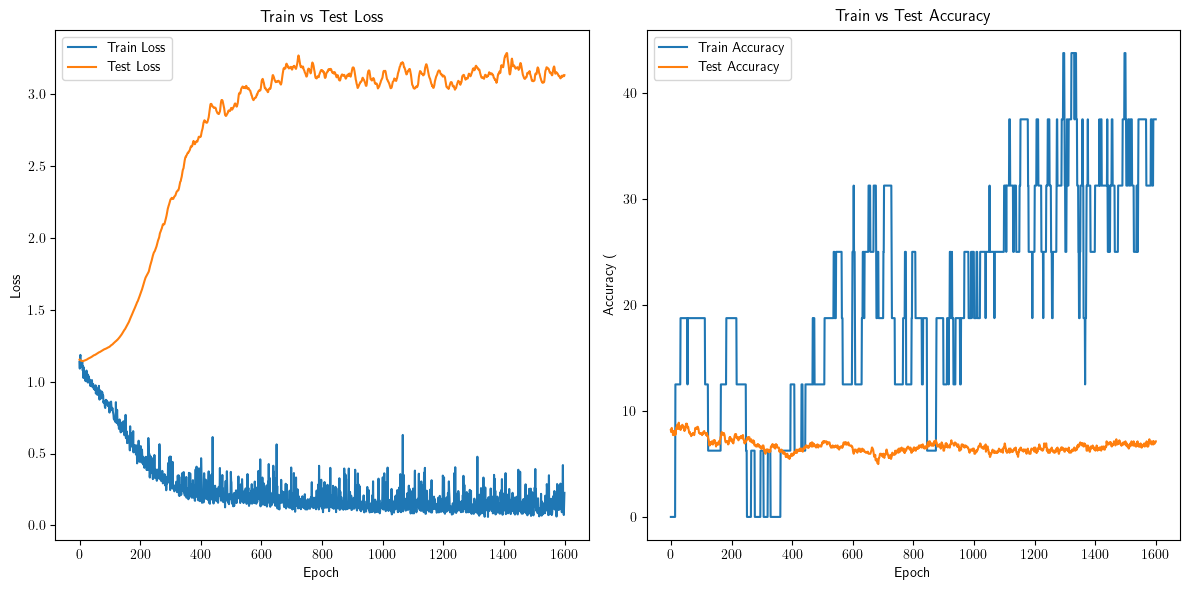

lr=0.001, hidden_dim=16, batch_size=8, epochs=1600
Final Train Loss: 0.2264, Final Test Loss: 3.1342
Final Train Accuracy: 37.50%, Final Test Accuracy: 7.13%

net_outputs_test[0] [1.07533   1.2265486 1.3621349 ... 1.9829495 1.8699086 1.7568676]


/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1024])) that is different to the input size (torch.Size([1024, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


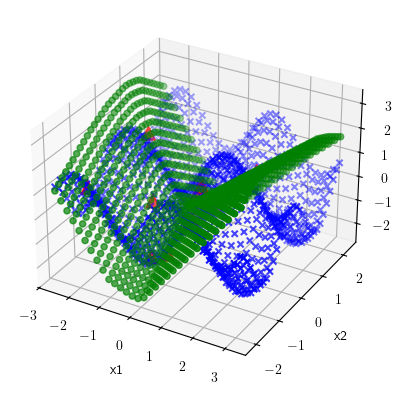

************************************************************************

**Running training with lr=0.002, hidden_dim=16, batch_size=8, epochs=1600


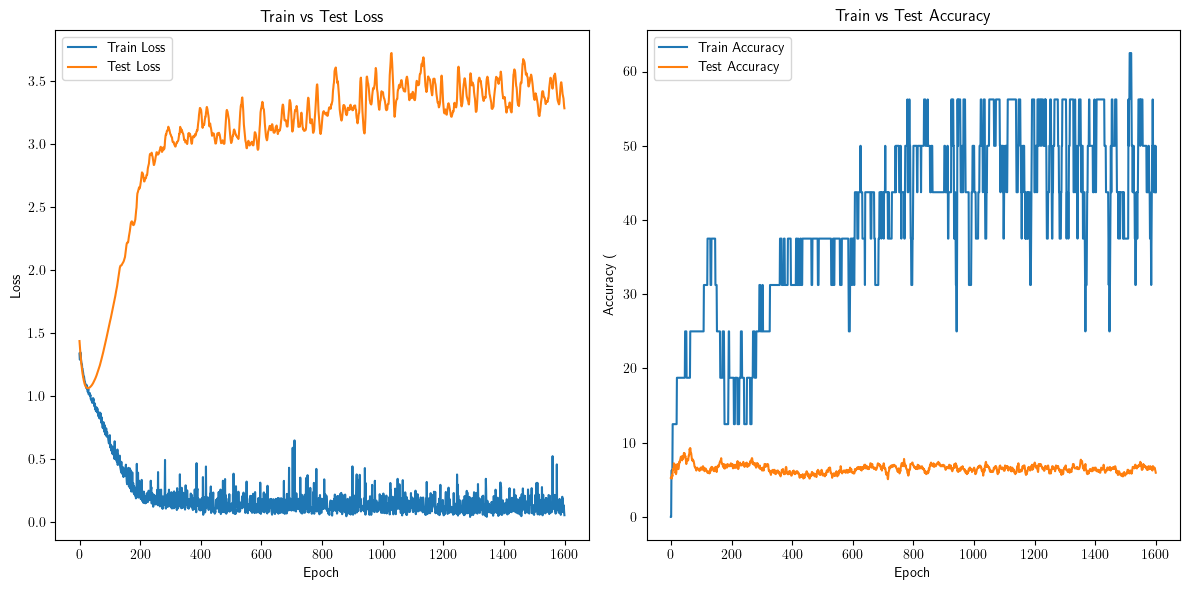

lr=0.002, hidden_dim=16, batch_size=8, epochs=1600
Final Train Loss: 0.0547, Final Test Loss: 3.2812
Final Train Accuracy: 43.75%, Final Test Accuracy: 5.96%

net_outputs_test[0] [1.0382142 1.1865337 1.3348527 ... 2.5023177 2.4424531 2.382587 ]


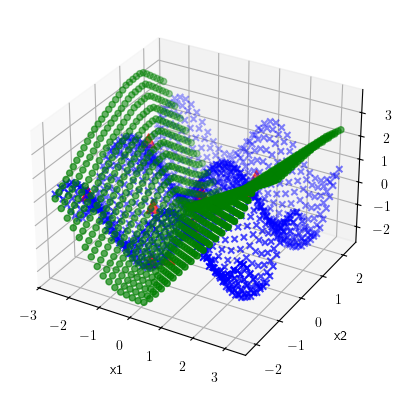

************************************************************************

**Running training with lr=0.002, hidden_dim=32, batch_size=8, epochs=1600


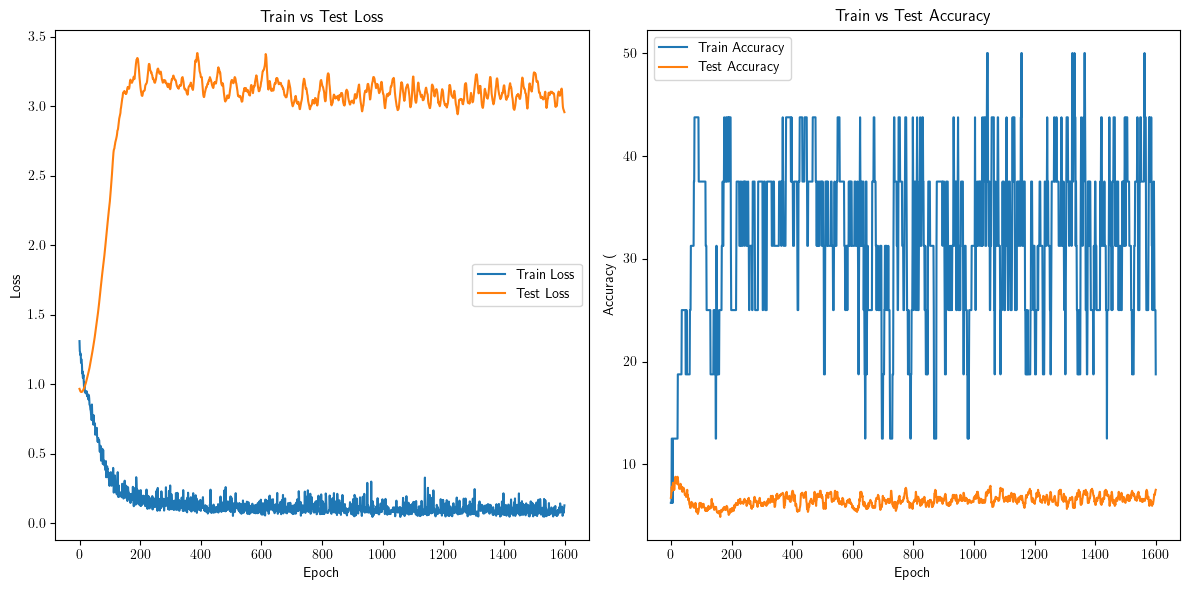

lr=0.002, hidden_dim=32, batch_size=8, epochs=1600
Final Train Loss: 0.1281, Final Test Loss: 2.9563
Final Train Accuracy: 18.75%, Final Test Accuracy: 7.52%

net_outputs_test[0] [0.91031075 1.1244903  1.3287929  ... 1.6992141  1.6149857  1.5307573 ]


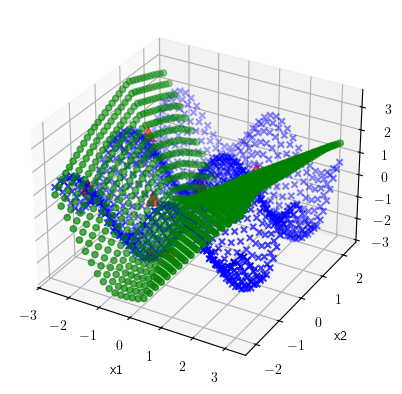

************************************************************************

**Running training with lr=0.002, hidden_dim=16, batch_size=8, epochs=2000


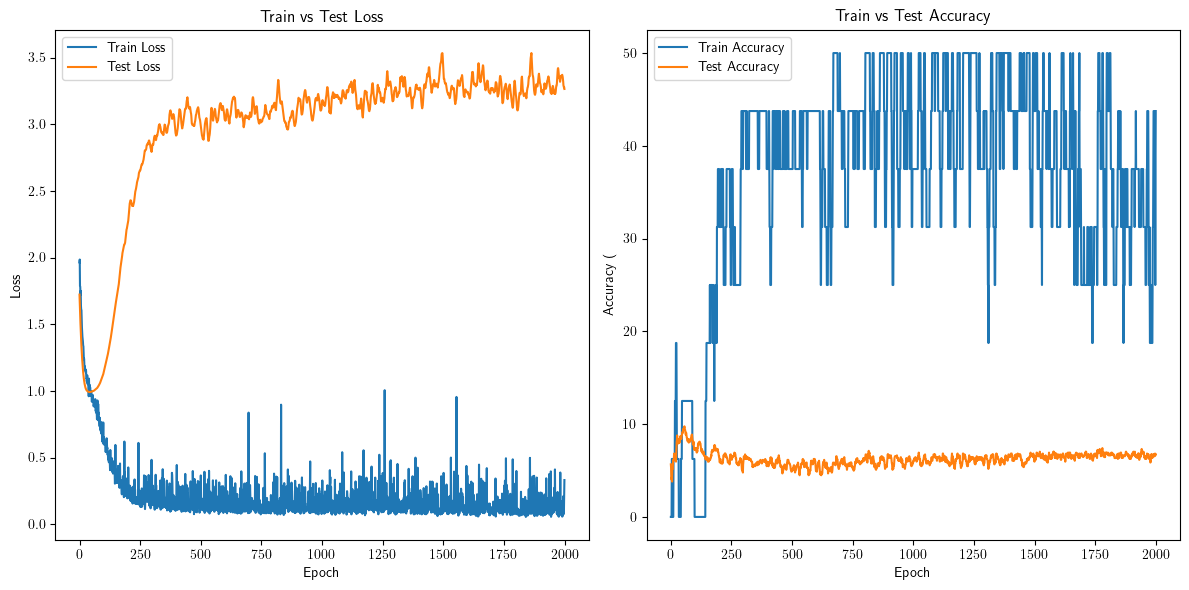

lr=0.002, hidden_dim=16, batch_size=8, epochs=2000
Final Train Loss: 0.3311, Final Test Loss: 3.2648
Final Train Accuracy: 43.75%, Final Test Accuracy: 6.74%

net_outputs_test[0] [0.9723922 1.1405313 1.3086708 ... 1.7851121 1.728893  1.6726732]


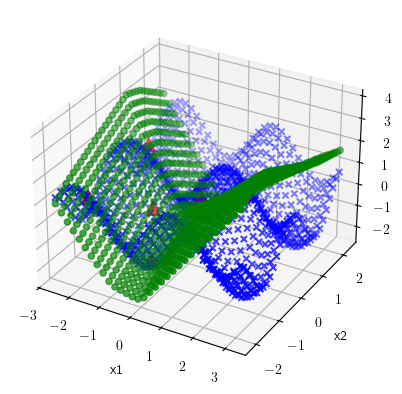

************************************************************************

**Running training with lr=0.003, hidden_dim=16, batch_size=8, epochs=1600


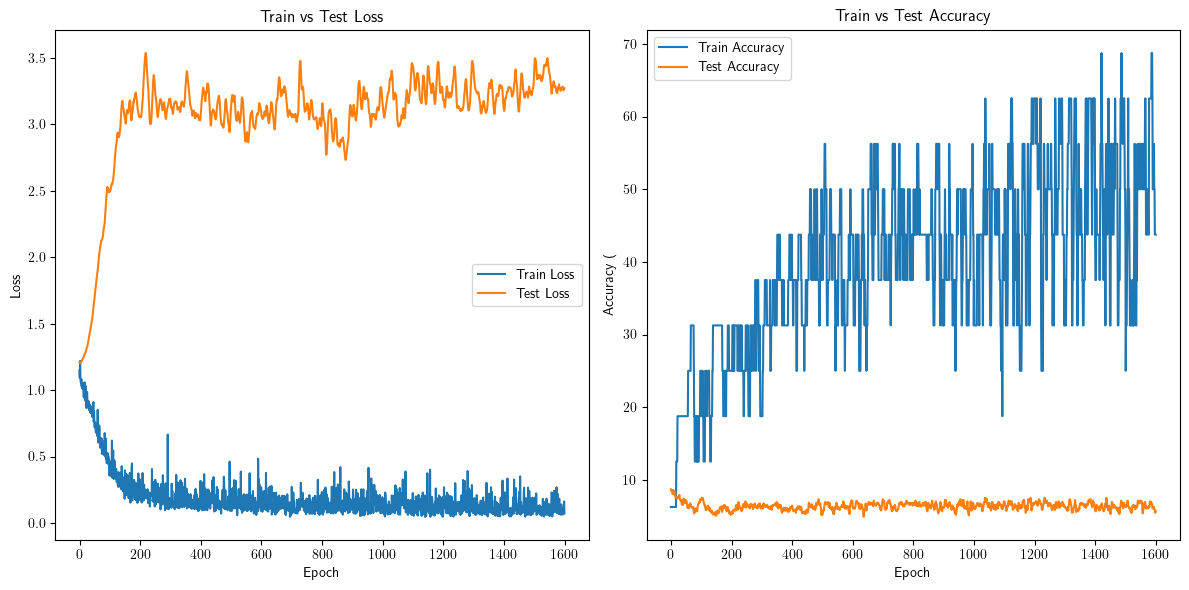

lr=0.003, hidden_dim=16, batch_size=8, epochs=1600
Final Train Loss: 0.0727, Final Test Loss: 3.2720
Final Train Accuracy: 43.75%, Final Test Accuracy: 5.66%

net_outputs_test[0] [0.8414831 0.9996083 1.1577333 ... 2.887163  2.8510637 2.8149643]


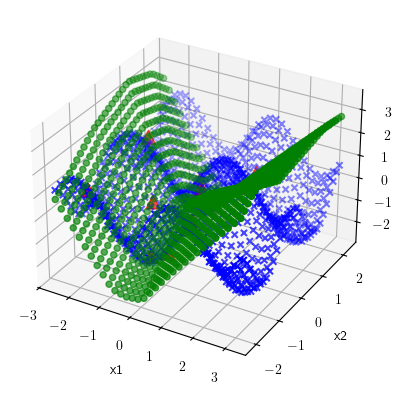

************************************************************************

**Running training with lr=0.003, hidden_dim=32, batch_size=8, epochs=1600


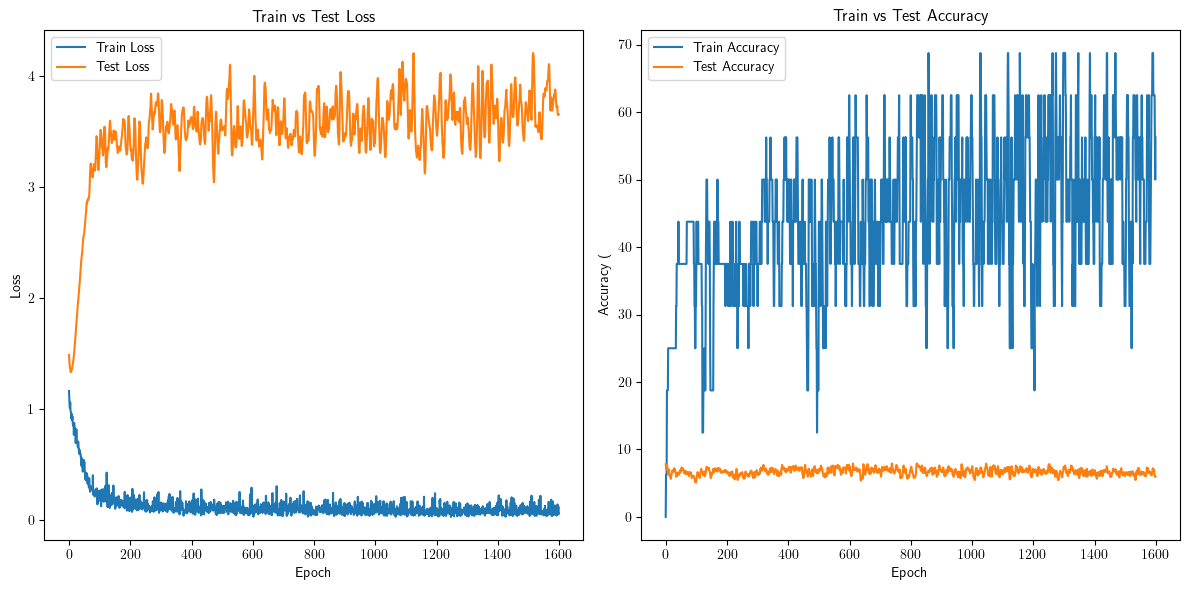

lr=0.003, hidden_dim=32, batch_size=8, epochs=1600
Final Train Loss: 0.1155, Final Test Loss: 3.6529
Final Train Accuracy: 56.25%, Final Test Accuracy: 5.96%

net_outputs_test[0] [1.0833137 1.2687322 1.4541507 ... 2.8755388 2.8081765 2.7408142]


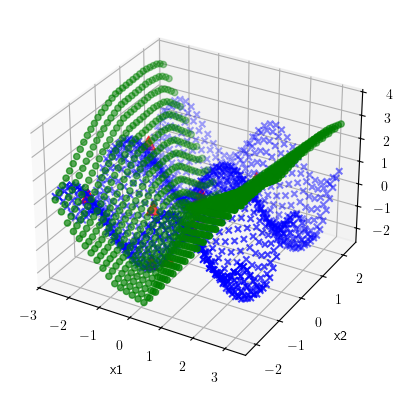

************************************************************************

**Running training with lr=0.003, hidden_dim=32, batch_size=8, epochs=2000


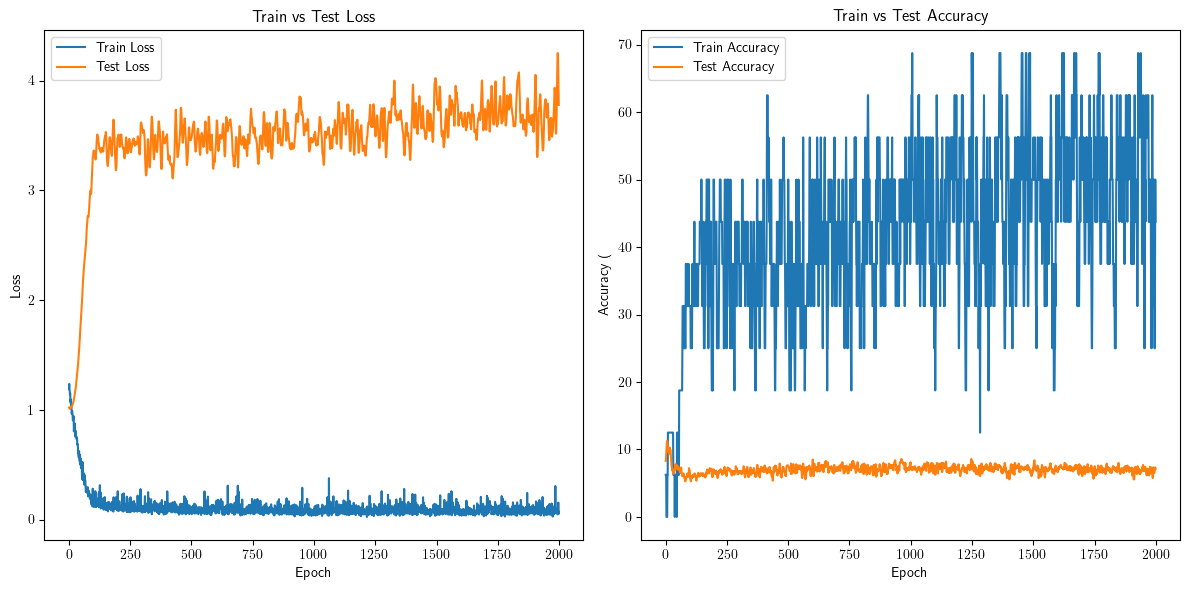

lr=0.003, hidden_dim=32, batch_size=8, epochs=2000
Final Train Loss: 0.0722, Final Test Loss: 3.7781
Final Train Accuracy: 43.75%, Final Test Accuracy: 7.13%

net_outputs_test[0] [0.90413225 1.1126746  1.313414   ... 2.7636278  2.7199898  2.6763523 ]


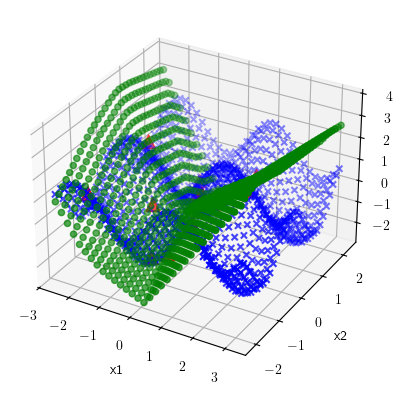

************************************************************************


/var/folders/r2/cy8j_dvs5rdc5kdnw_vlxscr0000gn/T/ipykernel_37132/266687761.py:331: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


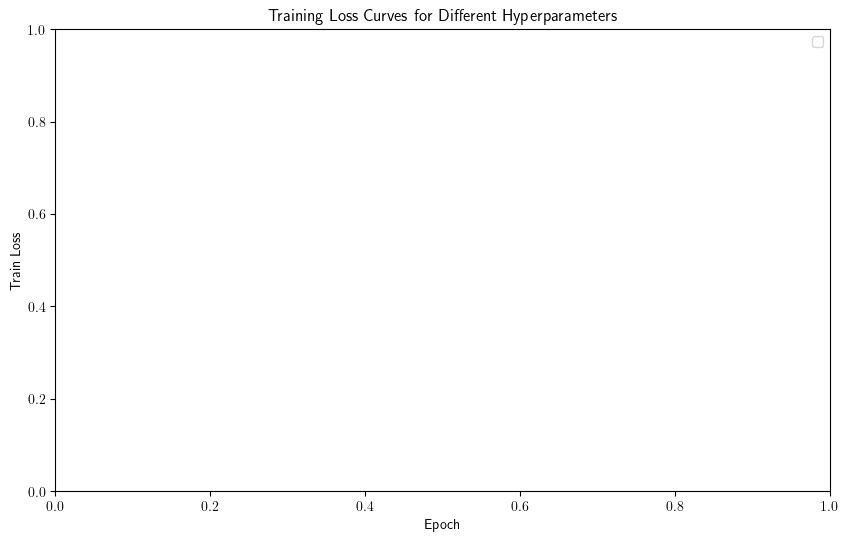


Comparison of final results:


In [127]:
###############################################Modified Code to 3D#########################################################
#############################4. different Hyperparameters new version with test loss  and add normalization and dropout#####################################################

# Import matplotlib for plotting purposes
import matplotlib
matplotlib.rcParams["text.usetex"] = True
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sometimes, we need Numpy, but wherever possible, we prefer torch.
import numpy as np

# Import PyTorch
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Float (32 bit) or Double (64 bit) precision? Choose!
torch.set_default_dtype(torch.float32)#64)
torch.set_num_threads(4) # Use _maximally_ 4 CPU cores

# This is a list to store the losses of the different hyperparameter configurations
train_losses_all = []
test_losses_all = []
models = []

# This is a list to store the hyperparameters of the training
# hyperparam_log = []

#device = torch.device("cpu")
# Choose a device for major calculations (if there is a special GPU card, you usually want that).
# My GPU is not very performant for double precision, so I stay on CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
device = torch.device(device)

# File path for saving the trained NN later.
# If only providing the file name (like here), the file will be generated in the same folder as the Python script
model_file = "mymodel.torch"

## The following script shows a data-driven training of a Neural Network.
## The data is generated in this script, too, by sampling from a function.
## The variables below are used to control this sampling
samples = 16
sample_min = -5
sample_max = 5
sample_span = sample_max - sample_min

## These parameters are usual hyperparameters of the NN and its training.
# batch_size = 8 # How many samples shall be presented to the NN, before running another optimizer step?
# hidden_dim = 16 # How many neurons shall there be in the hidden layer(s)?
input_dim = 2 # Input dimension of the NN (i.e. how many neurons are in the input layer?)
output_dim = 1 # Some for output

epochs = 2000 # Number of training iterations to be performed
lr = 0.002 # Which learning rate is passed to the training algorithm?

## Choose a criterion to evaluate the results. Here, we choose Mean Square error.
## The term "loss" means about the same as "remaining error" or "residual".
criterion = nn.MSELoss(reduction="mean")

## Here, we create the training data. In this example, we draw samples within the sampling interval and then pass it to
## e.g. the sin function (choose other functions to experiment with this script)
train_x = (sample_span * torch.rand(samples, 2) + sample_min * torch.ones(samples, 2))
train_y = torch.sin(train_x[:, 0]) + torch.cos(train_x[:, 1]) ##torch.pow(test_x, 2)


# add noise to the training data
noise_level = 0.3  # noise level
train_y += noise_level * torch.randn_like(train_y)

## This function logs the hyperparameters of the training
def log_hyperparameters(config, train_loss, test_loss, train_losses):
    hyperparam_log.append({
        "learning_rate": config["lr"],
        "hidden_dim": config["hidden_dim"],
        "batch_size": config["batch_size"],
        "epochs": config["epochs"],
        "final_train_loss": train_loss,
        "final_test_loss": test_loss,
        "train_losses": train_losses  # Include train_losses here
    })

# print ("train_x", train_x)
# print ("train_y", train_y)

## Here, we create the test data. To show the effect of extrapolation and the detailed behavior of the NN,
## we choose points a bit outside the interval that we used for sampling training data. Also, we very dense points.
# test_x = torch.zeros(20*samples, 2)
# test_x[:, 0] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])
# test_x[:, 1] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])

# create test_x with meshgrid
grid_size = int(samples ** 0.5) * 2 
margin = 1  # only extend 1. from -5 to 5, extend to -6 to 6 
x1 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x2 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x1, x2 = torch.meshgrid(x1, x2) 
test_x = torch.zeros(2*samples*2*samples, 2)
test_x[:, 0] = x1.reshape(-1)
test_x[:, 1] = x2.reshape(-1)
test_y = torch.sin(test_x[:, 0]) + torch.cos(test_x[:, 1]) ##torch.pow(test_x, 2)

# standardize the data
scaler = StandardScaler()
train_x = torch.tensor(scaler.fit_transform(train_x), dtype=torch.float32)
test_x = torch.tensor(scaler.transform(test_x), dtype=torch.float32)

## We want a DataLoader to handle batching and shuffling of the training data for us.
## The DataLoader needs a TensorDataset, hence we create one from the Training data.
train_data = TensorDataset(train_x, train_y)
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=False)


## This class creates the actual Neural Network.
class MLNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLNet, self).__init__()
        self.hidden_dim = hidden_dim

        ## In this case, I decided to pack the layers into a single container of type nn.Sequential
        ## This container is useful for Fully Connected NNs, where the output of each layer is just fed into the following layer.
        ## added dropout layer, which is a regularization technique to prevent overfitting
        self.fcnn1 = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            #nn.Tanh(),
            nn.ReLU(),
            #nn.Linear(hidden_dim, hidden_dim),
            #nn.ReLU(),
            #nn.Linear(hidden_dim, hidden_dim),
            nn.Dropout(p=0.05),  # Dropout layer with 30% of neurons being dropped，but it's not working well，the model underfitting, so change to 0.05
            #nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
        ) ## That network here has exactly 1 hidden layer (comment out some lines or write new ones to add more layers)
        ## nn.Linear is in the pictures represented by the arrows and has the weights (and biases) which are the
        ## parameters of the NN.
        ## nn.ReLU and Tanh are examples for activation functions - in the pictures, these are the bubbles / neurons.
        ## Usually, the pattern is interchanging between one linear layer, one activation function, one linear layer, one activation function and so on

    ## It is required to write a function that is executed when calling the NN model.
    ## Usually, it takes the input data and passes it through the layers.
    ## Here, it is sufficient to call the sequential container since this container does exactly this job.
    ## But this function "forward" could also be used to set up more complex NN architectures with more complex data flows
    def forward(self, x):
        out = self.fcnn1(x)
        return out

## This function performs a test run with the NN.
## It takes the NN model and the test data, passes the test inputs through the network and
## compares it with the target values = test outputs = targets
## and based on that calculates the loss value
def evaluate(model, test_x, test_y):
    ## For testing, we don't need the autograd feature/ protocol of all calculation steps
    ## So, save some time and disable grad tracking.
    with torch.no_grad():
        model.eval() ## Set the NN model into evaluation mode
        outputs = [] ## Create empty lists to store the results
        targets = []
        testlosses = []

        out = model(test_x.to(device)) ## Call the model, i.e. perform the actual inference

        ## Move the output quantities to the CPU, detach them from the tensor operation book-keeping and convert them to numpy arrays/ vectors.
        ## This is all necessary for plotting
        outputs.append(out.cpu().detach().numpy())
        targets.append(test_y.cpu().detach().numpy())
        testlosses.append(criterion(out, test_y.to(device)).item())

    ## Now return that in form of a triple of variables
    return outputs, targets, testlosses

## This calls the evaluate function and takes care of the plotting.
def eval_and_plot(model):
        ## matplotlib tries to be similar to the plot functions of matlab  (admittedly, the commands have to begin with "plt.", but the rest
        ## is quite similar.)

        # create a 3D plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ## Call the network on the test data
        net_outputs_test, targets_test, testlosses = evaluate(model, test_x, test_y)   
        # Plot the targets first in blue (which means to plot the actual function over the whole test interval)
        #ax.plot(test_x[:, 0], test_x[:, 1], targets_test[0], color="-b", label="Target")
        ax.scatter(test_x[:, 0], test_x[:, 1], targets_test[0], c='b', marker='x', label='Target')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('y')

        ## Call the network on the training data
        net_outputs_train, targets_train, testlosses = evaluate(model, train_x, train_y)
        ## First, plot the targets in red, i.e. plot the training data set
        ax.scatter(train_x[:, 0], train_x[:, 1], targets_train[0], c='r', s=100, marker='^', label='Target')

        ## Now, plot the output of the NN on the whole test interval in green
        ## This allows us to see how the NN performs for interpolation as well as for extrapolation
        ax.scatter(test_x[:, 0], test_x[:, 1], net_outputs_test[0].reshape(-1), c='g', marker='o', label='Learned')
        print("net_outputs_test[0]", net_outputs_test[0].reshape(-1))

        ## All plotting is done, open the plot window
        plt.show()

def calculate_accuracy(predictions, targets, threshold=0.1):
    """
    Calculate accuracy for regression by checking if predictions are within a certain range of targets.
    Args:
        predictions: Predicted values (torch.Tensor).
        targets: Actual values (torch.Tensor).
        threshold: Acceptable error range for considering a prediction as correct.
    Returns:
        Accuracy as a percentage (float).
    """
    correct = torch.abs(predictions - targets) <= threshold
    return correct.float().mean().item() * 100  # Convert to percentage

def train_with_logging(train_loader, lr_run, hidden_dim_run, EPOCHS):
    model = MLNet(input_dim, hidden_dim_run, output_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr_run, weight_decay=1e-5)

    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []

    for epoch in range(EPOCHS):
        model.train()
        avg_loss = 0.
        for x, label in train_loader:
            model.zero_grad()
            out = model(x.to(device)).squeeze(-1)
            loss = criterion(out, label.to(device))
            loss.backward()
            optimizer.step()
            avg_loss += loss.item()
        
        # Store train loss for the epoch
        train_losses.append(avg_loss / len(train_loader))

        # Evaluate train accuracy
        with torch.no_grad():
            model.eval()
            train_out = model(train_x.to(device)).squeeze(-1)
            train_accuracy = calculate_accuracy(train_out, train_y.to(device))
            train_accuracies.append(train_accuracy)

            # Evaluate test loss and accuracy
            test_out = model(test_x.to(device)).squeeze(-1)
            test_loss = criterion(test_out, test_y.to(device)).item()
            test_losses.append(test_loss)

            test_accuracy = calculate_accuracy(test_out, test_y.to(device))
            test_accuracies.append(test_accuracy)

    return model, train_losses, test_losses, train_accuracies, test_accuracies


## As the functions written before are just function definitions,
## those functions still have to be called.
## This is done here.
## Train the model
# model = train(train_loader, lr, epochs)

## Test that saving the model worked: load it from file
# model = torch.load(model_file)
## and evaluate and plot once
# eval_and_plot(model)

###################### Hyperparameter Search Loop ######################
hyperparam_log = []  # reset hyperparam_log

hyperparam_configs = [
    {"lr":0.001, "hidden_dim":16, "batch_size":8, "epochs":1600},
    {"lr":0.002, "hidden_dim":16, "batch_size":8, "epochs":1600},
    {"lr":0.002, "hidden_dim":32, "batch_size":8, "epochs":1600},
    {"lr":0.002, "hidden_dim":16, "batch_size":8, "epochs":2000},
    {"lr":0.003, "hidden_dim":16, "batch_size":8, "epochs":1600},
    {"lr":0.003, "hidden_dim":32, "batch_size":8, "epochs":1600},
    {"lr":0.003, "hidden_dim":32, "batch_size":8, "epochs":2000},
]

for config in hyperparam_configs:
    lr_run          = config["lr"]
    hidden_dim_run  = config["hidden_dim"]
    batch_size_run  = config["batch_size"]
    epochs_run      = config["epochs"]

    print(f"\n**Running training with lr={lr_run}, hidden_dim={hidden_dim_run}, batch_size={batch_size_run}, epochs={epochs_run}")

    # Train the model with logging
    model, train_losses, test_losses, train_accuracies, test_accuracies = train_with_logging(train_loader, lr_run, hidden_dim_run, epochs_run)

    # Plot the losses and accuracies
    plt.figure(figsize=(12, 6))
    
    # Loss plot
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train Loss")
    plt.plot(test_losses, label="Test Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Train vs Test Loss")
    plt.legend()

    # Accuracy plot
    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label="Train Accuracy")
    plt.plot(test_accuracies, label="Test Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy (%)")
    plt.title("Train vs Test Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()

    print(f"lr={lr_run}, hidden_dim={hidden_dim_run}, batch_size={batch_size_run}, epochs={epochs_run}")
    print(f"Final Train Loss: {train_losses[-1]:.4f}, Final Test Loss: {test_losses[-1]:.4f}")
    print(f"Final Train Accuracy: {train_accuracies[-1]:.2f}%, Final Test Accuracy: {test_accuracies[-1]:.2f}%\n")

    eval_and_plot(model)  # plot the training results
    print("************************************************************************")

###################### Plot multiple curves ######################
plt.figure(figsize=(10,6))
for entry in hyperparam_log:
    plt.plot(entry["train_losses"],
             label=f"lr={entry['learning_rate']}, hidden={entry['hidden_dim']}, final_train_loss={entry['final_train_loss']:.4f}")
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("Training Loss Curves for Different Hyperparameters")
plt.legend()
plt.show()

###################### Compare final results ######################
print("\nComparison of final results:")
for entry in hyperparam_log:
    print(f"Config: lr={entry['learning_rate']}, hidden_dim={entry['hidden_dim']}, "
          f"epoch={entry['epochs']} => Train Loss={entry['final_train_loss']:.4f}, "
          f"Test Loss={entry['final_test_loss']:.4f}, Train Accuracy={entry['train_accuracies'][-1]:.2f}%, "
          f"Test Accuracy={entry['test_accuracies'][-1]:.2f}%")

## This function is used to plot the hyperparameter logs
#plot_hyperparameter_logs()

Using cpu device

**Running training with lr=0.001, hidden_dim=16, batch_size=8, epochs=1600
Epoch 1599/1600, Loss=0.1837
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.0, inplace=False)
    (3): Linear(in_features=16, out_features=1, bias=True)
  )
)


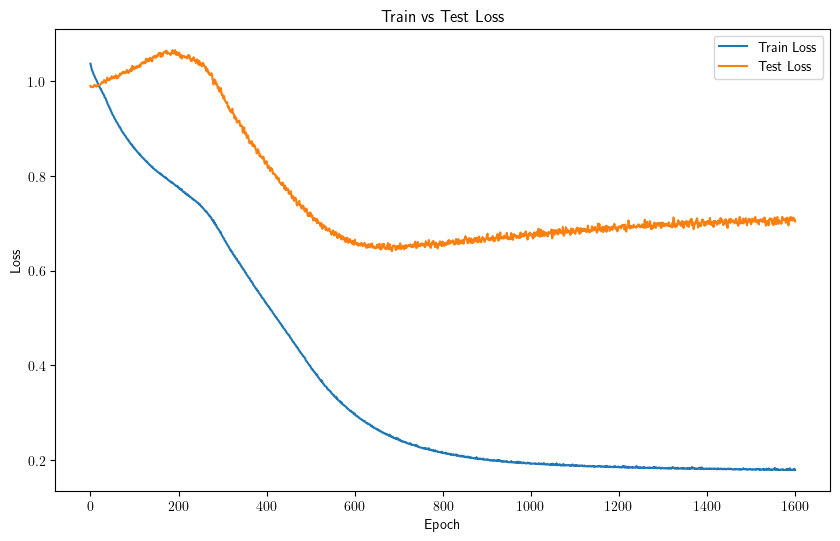

lr=0.001, hidden_dim=16, batch_size=8, epochs=1600

Final Train loss: 0.1820, Test loss: 0.7484 **



/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([16384])) that is different to the input size (torch.Size([16384, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/Users/chexuanyou/anaconda3/envs/myenv/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


net_outputs_test[0] [ 0.33519632  0.35625163  0.37730625 ... -3.2847376  -3.3160515
 -3.347365  ]
Prediction min: -3.347365
Prediction max: 2.6928334


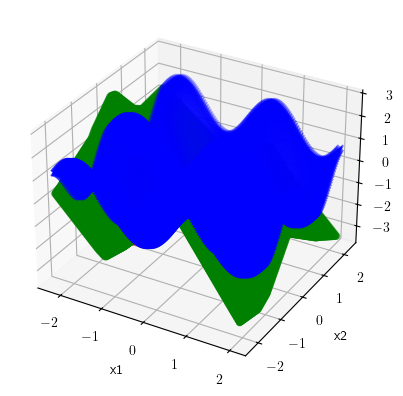

************************************************************************

**Running training with lr=0.002, hidden_dim=16, batch_size=8, epochs=1600
Epoch 1599/1600, Loss=0.1582
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.0, inplace=False)
    (3): Linear(in_features=16, out_features=1, bias=True)
  )
)


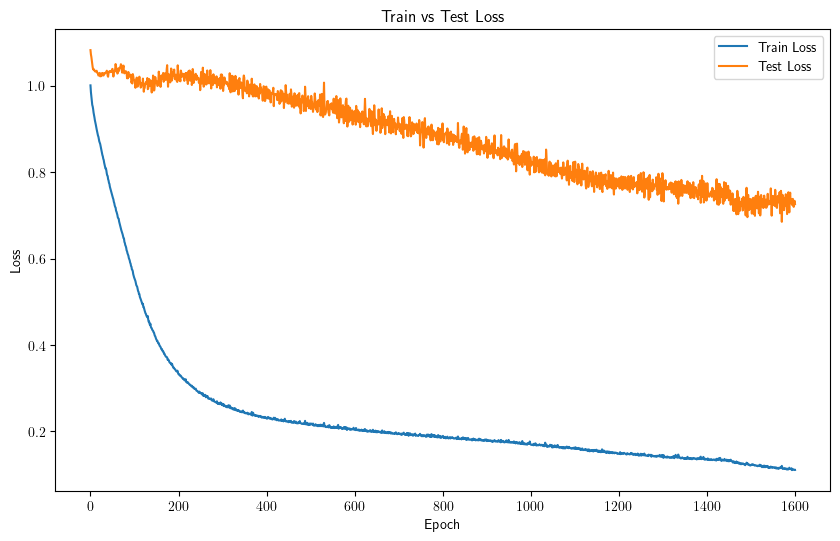

lr=0.002, hidden_dim=16, batch_size=8, epochs=1600

Final Train loss: 0.1567, Test loss: 0.8105 **

net_outputs_test[0] [ 0.40394393  0.40373543  0.40352616 ... -3.5819485  -3.624057
 -3.666167  ]
Prediction min: -3.666167
Prediction max: 2.3104475


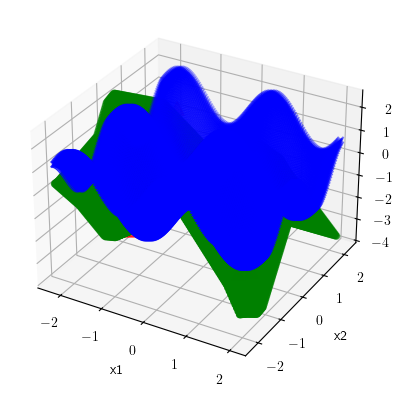

************************************************************************

**Running training with lr=0.002, hidden_dim=32, batch_size=8, epochs=1600
Epoch 1599/1600, Loss=0.0999
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.0, inplace=False)
    (3): Linear(in_features=32, out_features=1, bias=True)
  )
)


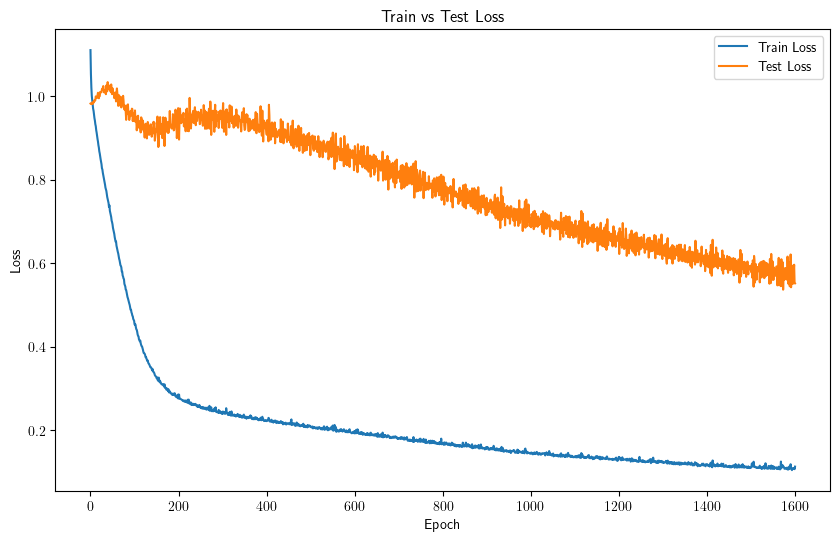

lr=0.002, hidden_dim=32, batch_size=8, epochs=1600

Final Train loss: 0.0933, Test loss: 0.4035 **

net_outputs_test[0] [ 2.7927213  2.7635403  2.7343602 ... -1.5712701 -1.5296166 -1.4879647]
Prediction min: -3.416111
Prediction max: 3.2992826


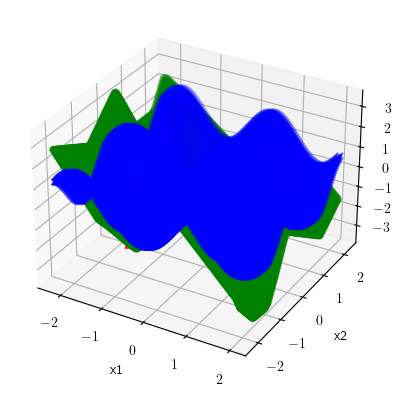

************************************************************************

**Running training with lr=0.002, hidden_dim=16, batch_size=8, epochs=2000
Epoch 1999/2000, Loss=0.1313
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.0, inplace=False)
    (3): Linear(in_features=16, out_features=1, bias=True)
  )
)


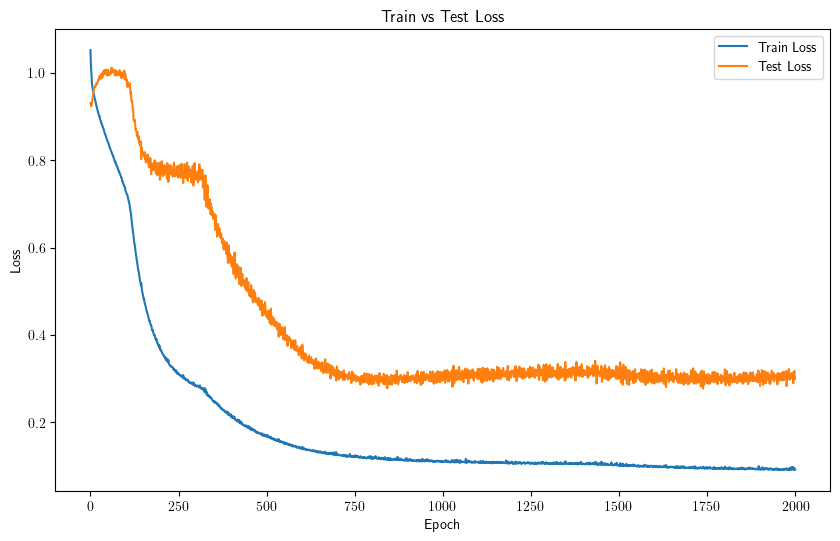

lr=0.002, hidden_dim=16, batch_size=8, epochs=2000

Final Train loss: 0.1303, Test loss: 0.8257 **

net_outputs_test[0] [ 2.3213315  2.2834578  2.2455866 ... -4.4638815 -4.5416594 -4.619437 ]
Prediction min: -4.619437
Prediction max: 2.495488


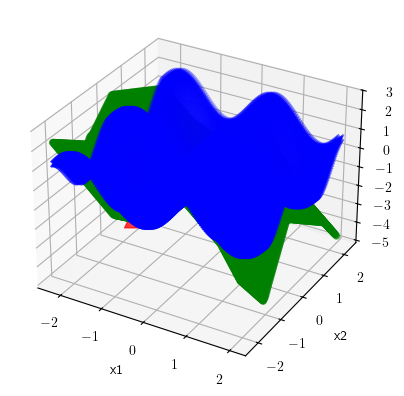

************************************************************************

**Running training with lr=0.003, hidden_dim=16, batch_size=8, epochs=1600
Epoch 1599/1600, Loss=0.1667
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.0, inplace=False)
    (3): Linear(in_features=16, out_features=1, bias=True)
  )
)


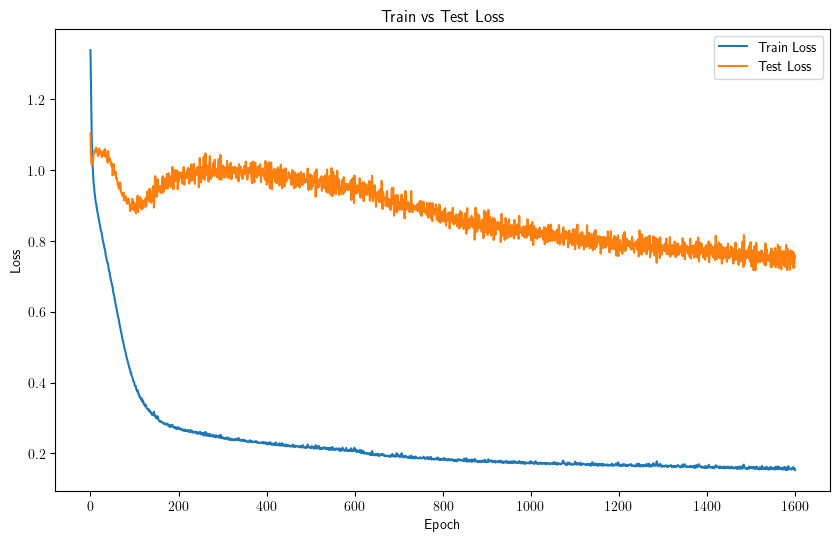

lr=0.003, hidden_dim=16, batch_size=8, epochs=1600

Final Train loss: 0.1652, Test loss: 0.8280 **

net_outputs_test[0] [ 0.13099426  0.17196038  0.2129265  ... -3.4931028  -3.5345716
 -3.5760393 ]
Prediction min: -3.666412
Prediction max: 2.8420932


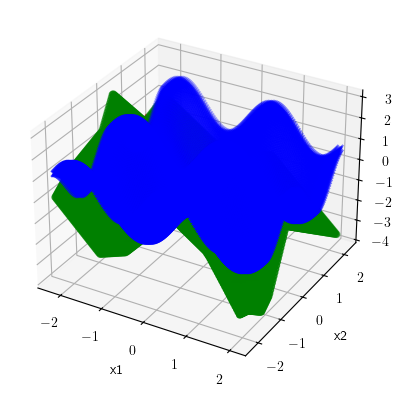

************************************************************************

**Running training with lr=0.003, hidden_dim=32, batch_size=8, epochs=1600
Epoch 1599/1600, Loss=0.0733
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.0, inplace=False)
    (3): Linear(in_features=32, out_features=1, bias=True)
  )
)


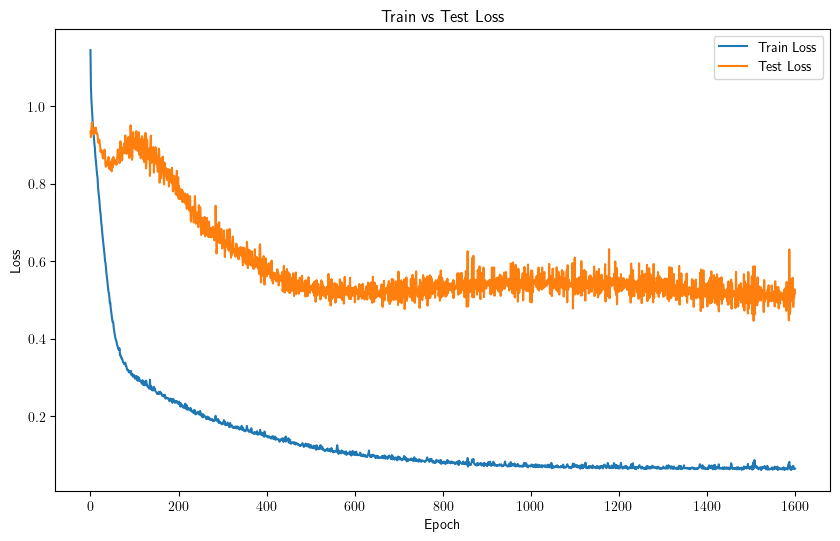

lr=0.003, hidden_dim=32, batch_size=8, epochs=1600

Final Train loss: 0.0675, Test loss: 0.2953 **

net_outputs_test[0] [ 2.6218634  2.5898082  2.5577526 ... -1.5071874 -1.4921306 -1.4770744]
Prediction min: -4.009094
Prediction max: 2.6218634


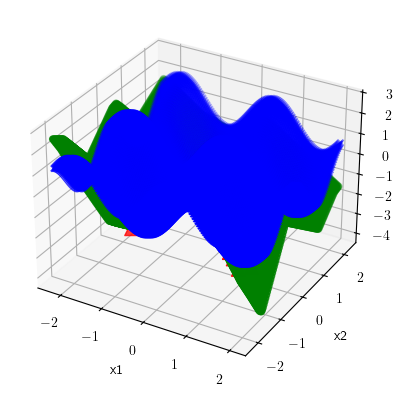

************************************************************************

**Running training with lr=0.003, hidden_dim=32, batch_size=8, epochs=2000
Epoch 1999/2000, Loss=0.0662
MLNet(
  (fcnn1): Sequential(
    (0): Linear(in_features=2, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.0, inplace=False)
    (3): Linear(in_features=32, out_features=1, bias=True)
  )
)


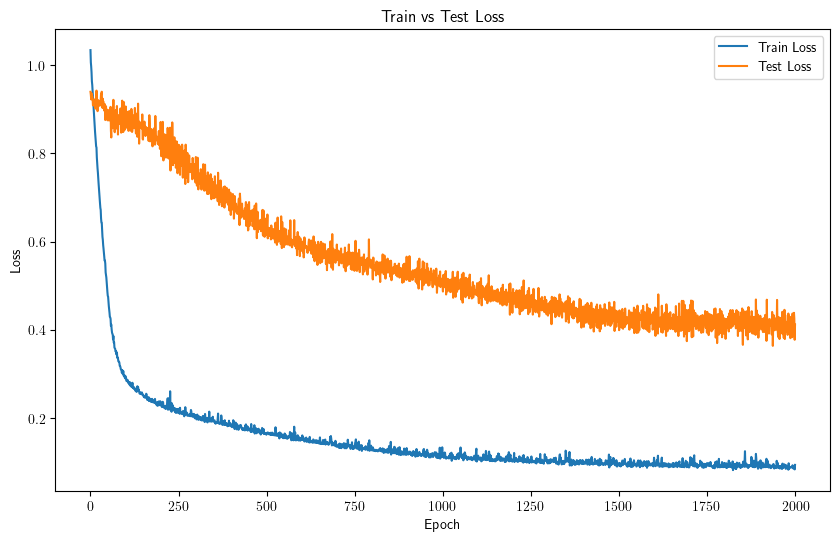

lr=0.003, hidden_dim=32, batch_size=8, epochs=2000

Final Train loss: 0.0643, Test loss: 0.4271 **

net_outputs_test[0] [ 2.6466622   2.619093    2.5915232  ... -0.3000943  -0.20112383
 -0.10215344]
Prediction min: -3.461877
Prediction max: 3.8135548


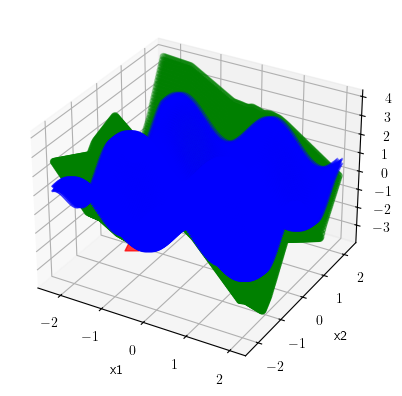

************************************************************************


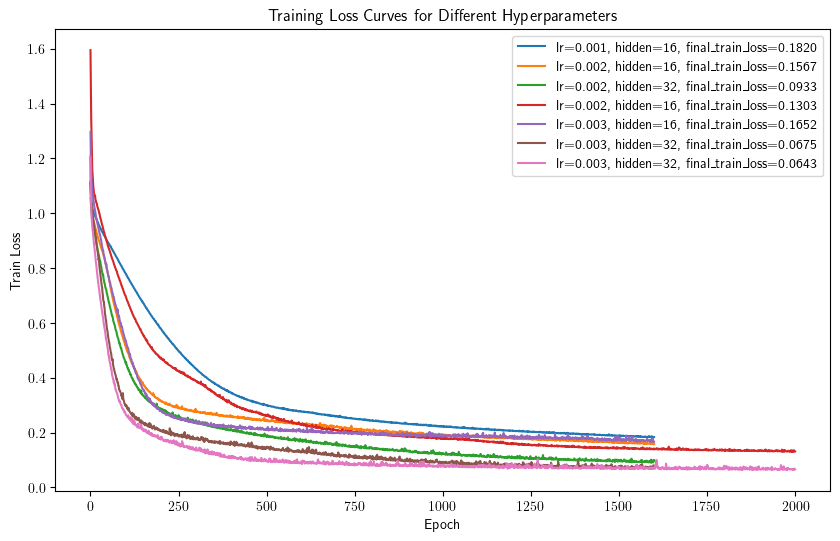


Comparison of final results:
Config: lr=0.001, hidden_dim=16, epoch=1600 => Train Loss=0.1820, Test Loss=0.7484
Config: lr=0.002, hidden_dim=16, epoch=1600 => Train Loss=0.1567, Test Loss=0.8105
Config: lr=0.002, hidden_dim=32, epoch=1600 => Train Loss=0.0933, Test Loss=0.4035
Config: lr=0.002, hidden_dim=16, epoch=2000 => Train Loss=0.1303, Test Loss=0.8257
Config: lr=0.003, hidden_dim=16, epoch=1600 => Train Loss=0.1652, Test Loss=0.8280
Config: lr=0.003, hidden_dim=32, epoch=1600 => Train Loss=0.0675, Test Loss=0.2953
Config: lr=0.003, hidden_dim=32, epoch=2000 => Train Loss=0.0643, Test Loss=0.4271


In [126]:
###############################################Modified Code to 3D#########################################################
#############################different Hyperparameters new version with test loss  and add normalization and dropout#####################################################
# #####################################################
# Import matplotlib for plotting purposes
import matplotlib
matplotlib.rcParams["text.usetex"] = True
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Sometimes, we need Numpy, but wherever possible, we prefer torch.
import numpy as np

# Import PyTorch
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

# Float (32 bit) or Double (64 bit) precision? Choose!
torch.set_default_dtype(torch.float32)#64)
torch.set_num_threads(4) # Use _maximally_ 4 CPU cores

# This is a list to store the losses of the different hyperparameter configurations
train_losses_all = []
test_losses_all = []
models = []

# This is a list to store the hyperparameters of the training
# hyperparam_log = []

#device = torch.device("cpu")
# Choose a device for major calculations (if there is a special GPU card, you usually want that).
# My GPU is not very performant for double precision, so I stay on CPU
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
device = torch.device(device)

# File path for saving the trained NN later.
# If only providing the file name (like here), the file will be generated in the same folder as the Python script
model_file = "mymodel.torch"

## The following script shows a data-driven training of a Neural Network.
## The data is generated in this script, too, by sampling from a function.
## The variables below are used to control this sampling
samples = 64
sample_min = -5
sample_max = 5
sample_span = sample_max - sample_min

## These parameters are usual hyperparameters of the NN and its training.
# batch_size = 8 # How many samples shall be presented to the NN, before running another optimizer step?
# hidden_dim = 16 # How many neurons shall there be in the hidden layer(s)?
input_dim = 2 # Input dimension of the NN (i.e. how many neurons are in the input layer?)
output_dim = 1 # Some for output

epochs = 2000 # Number of training iterations to be performed
lr = 0.002 # Which learning rate is passed to the training algorithm?

## Choose a criterion to evaluate the results. Here, we choose Mean Square error.
## The term "loss" means about the same as "remaining error" or "residual".
criterion = nn.MSELoss(reduction="mean")

## Here, we create the training data. In this example, we draw samples within the sampling interval and then pass it to
## e.g. the sin function (choose other functions to experiment with this script)
train_x = (sample_span * torch.rand(samples, 2) + sample_min * torch.ones(samples, 2))
train_y = torch.sin(train_x[:, 0]) + torch.cos(train_x[:, 1]) ##torch.pow(test_x, 2)


# add noise to the training data
noise_level = 0.3  # noise level
train_y += noise_level * torch.randn_like(train_y)

## This function logs the hyperparameters of the training
def log_hyperparameters(config, train_loss, test_loss, train_losses):
    hyperparam_log.append({
        "learning_rate": config["lr"],
        "hidden_dim": config["hidden_dim"],
        "batch_size": config["batch_size"],
        "epochs": config["epochs"],
        "final_train_loss": train_loss,
        "final_test_loss": test_loss,
        "train_losses": train_losses  # Include train_losses here
    })

# print ("train_x", train_x)
# print ("train_y", train_y)

## Here, we create the test data. To show the effect of extrapolation and the detailed behavior of the NN,
## we choose points a bit outside the interval that we used for sampling training data. Also, we very dense points.
# test_x = torch.zeros(20*samples, 2)
# test_x[:, 0] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])
# test_x[:, 1] = torch.linspace(sample_min - 0.5*sample_span, sample_max + 0.5*sample_span, test_x.size()[0])

# create test_x with meshgrid
grid_size = int(samples ** 0.5) * 2 
margin = 1  # only extend 1. from -5 to 5, extend to -6 to 6 
x1 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x2 = torch.linspace(sample_min - margin, sample_max + margin, 2*samples)
x1, x2 = torch.meshgrid(x1, x2) 
test_x = torch.zeros(2*samples*2*samples, 2)
test_x[:, 0] = x1.reshape(-1)
test_x[:, 1] = x2.reshape(-1)
test_y = torch.sin(test_x[:, 0]) + torch.cos(test_x[:, 1]) ##torch.pow(test_x, 2)

# standardize the data
scaler = StandardScaler()
train_x = torch.tensor(scaler.fit_transform(train_x), dtype=torch.float32)
test_x = torch.tensor(scaler.transform(test_x), dtype=torch.float32)

## We want a DataLoader to handle batching and shuffling of the training data for us.
## The DataLoader needs a TensorDataset, hence we create one from the Training data.
train_data = TensorDataset(train_x, train_y)
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, drop_last=False)


## This class creates the actual Neural Network.
class MLNet(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(MLNet, self).__init__()
        self.hidden_dim = hidden_dim

        ## In this case, I decided to pack the layers into a single container of type nn.Sequential
        ## This container is useful for Fully Connected NNs, where the output of each layer is just fed into the following layer.
        ## added dropout layer, which is a regularization technique to prevent overfitting
        self.fcnn1 = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            #nn.Tanh(),
            nn.ReLU(),
            #nn.Linear(hidden_dim, hidden_dim),
            #nn.ReLU(),
            #nn.Linear(hidden_dim, hidden_dim),
            nn.Dropout(p=0.),  # Dropout layer with 30% of neurons being dropped，but it's not working well，the model underfitting, so change to 0.05
            #nn.ReLU(),
            nn.Linear(hidden_dim, output_dim),
        ) ## That network here has exactly 1 hidden layer (comment out some lines or write new ones to add more layers)
        ## nn.Linear is in the pictures represented by the arrows and has the weights (and biases) which are the
        ## parameters of the NN.
        ## nn.ReLU and Tanh are examples for activation functions - in the pictures, these are the bubbles / neurons.
        ## Usually, the pattern is interchanging between one linear layer, one activation function, one linear layer, one activation function and so on

    ## It is required to write a function that is executed when calling the NN model.
    ## Usually, it takes the input data and passes it through the layers.
    ## Here, it is sufficient to call the sequential container since this container does exactly this job.
    ## But this function "forward" could also be used to set up more complex NN architectures with more complex data flows
    def forward(self, x):
        out = self.fcnn1(x)
        return out

## This function performs a test run with the NN.
## It takes the NN model and the test data, passes the test inputs through the network and
## compares it with the target values = test outputs = targets
## and based on that calculates the loss value
def evaluate(model, test_x, test_y):
    ## For testing, we don't need the autograd feature/ protocol of all calculation steps
    ## So, save some time and disable grad tracking.
    with torch.no_grad():
        model.eval() ## Set the NN model into evaluation mode
        outputs = [] ## Create empty lists to store the results
        targets = []
        testlosses = []

        out = model(test_x.to(device)) ## Call the model, i.e. perform the actual inference

        ## Move the output quantities to the CPU, detach them from the tensor operation book-keeping and convert them to numpy arrays/ vectors.
        ## This is all necessary for plotting
        outputs.append(out.cpu().detach().numpy())
        targets.append(test_y.cpu().detach().numpy())
        testlosses.append(criterion(out, test_y.to(device)).item())

    ## Now return that in form of a triple of variables
    return outputs, targets, testlosses

## This calls the evaluate function and takes care of the plotting.
def eval_and_plot(model):
        ## matplotlib tries to be similar to the plot functions of matlab  (admittedly, the commands have to begin with "plt.", but the rest
        ## is quite similar.)

        # create a 3D plot
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        ## Call the network on the test data
        net_outputs_test, targets_test, testlosses = evaluate(model, test_x, test_y)   
        # Plot the targets first in blue (which means to plot the actual function over the whole test interval)
        #ax.plot(test_x[:, 0], test_x[:, 1], targets_test[0], color="-b", label="Target")
        ax.scatter(test_x[:, 0], test_x[:, 1], targets_test[0], c='b', marker='x', label='Target')
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('y')

        ## Call the network on the training data
        net_outputs_train, targets_train, testlosses = evaluate(model, train_x, train_y)
        ## First, plot the targets in red, i.e. plot the training data set
        ax.scatter(train_x[:, 0], train_x[:, 1], targets_train[0], c='r', s=100, marker='^', label='Target')

        ## Now, plot the output of the NN on the whole test interval in green
        ## This allows us to see how the NN performs for interpolation as well as for extrapolation
        ax.scatter(test_x[:, 0], test_x[:, 1], net_outputs_test[0].reshape(-1), c='g', marker='o', label='Learned')
        print("net_outputs_test[0]", net_outputs_test[0].reshape(-1))

        print("Prediction min:", net_outputs_test[0].min())
        print("Prediction max:", net_outputs_test[0].max())


        ## All plotting is done, open the plot window
        plt.show()

## This function takes care of the whole training, with logging of the training losses and test losses
def train_with_logging(train_loader, lr_run, hidden_dim_run, EPOCHS):
    model = MLNet(input_dim, hidden_dim_run, output_dim).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr_run, weight_decay=1e-5)

    train_losses = []
    test_losses = []

    for epoch in range(EPOCHS):
        model.train()
        avg_loss = 0.
        for x, label in train_loader:
            model.zero_grad()
            out = model(x.to(device)).squeeze(-1)
            loss = criterion(out, label.to(device))
            loss.backward()
            optimizer.step()
            avg_loss += loss.item()
        train_losses.append(avg_loss / len(train_loader))

        # Evaluate on test data
        with torch.no_grad():
            model.eval()
            test_out = model(test_x.to(device)).squeeze(-1)
            test_loss = criterion(test_out, test_y.to(device)).item()
            test_losses.append(test_loss)
    return model, train_losses, test_losses

## As the functions written before are just function definitions,
## those functions still have to be called.
## This is done here.
## Train the model
# model = train(train_loader, lr, epochs)

## Test that saving the model worked: load it from file
# model = torch.load(model_file)
## and evaluate and plot once
# eval_and_plot(model)

###################### Hyperparameter Search Loop ######################
hyperparam_log = []  # reset hyperparam_log

hyperparam_configs = [
    {"lr":0.001, "hidden_dim":16, "batch_size":8, "epochs":1600},
    {"lr":0.002, "hidden_dim":16, "batch_size":8, "epochs":1600},
    {"lr":0.002, "hidden_dim":32, "batch_size":8, "epochs":1600},
    {"lr":0.002, "hidden_dim":16, "batch_size":8, "epochs":2000},
    {"lr":0.003, "hidden_dim":16, "batch_size":8, "epochs":1600},
    {"lr":0.003, "hidden_dim":32, "batch_size":8, "epochs":1600},
    {"lr":0.003, "hidden_dim":32, "batch_size":8, "epochs":2000},
]

for config in hyperparam_configs:
    lr_run          = config["lr"]
    hidden_dim_run  = config["hidden_dim"]
    batch_size_run  = config["batch_size"]
    epochs_run      = config["epochs"]

    # update hyperparameters to be global variables
    lr         = lr_run
    hidden_dim = hidden_dim_run
    batch_size = batch_size_run
    epochs     = epochs_run

    print(f"\n**Running training with lr={lr}, hidden_dim={hidden_dim}, batch_size={batch_size}, epochs={epochs}")

    # train the model to get the results
    model, train_curve, final_train_loss, final_test_loss = train(train_loader, lr, hidden_dim, epochs)

    # show the model structure
    print(model)
    # Train the model with logging
    model1, train_losses, test_losses = train_with_logging(train_loader, lr, hidden_dim, epochs)

    # Plot the losses
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(train_losses)), train_losses, label="Train Loss")
    plt.plot(range(len(test_losses)), test_losses, label="Test Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Train vs Test Loss")
    plt.legend()
    plt.show()
    # save to hyperparam_log
    log_hyperparameters(config, final_train_loss, final_test_loss, train_curve)
    
    print(f"lr={lr}, hidden_dim={hidden_dim}, batch_size={batch_size}, epochs={epochs}\n")
    print(f"Final Train loss: {final_train_loss:.4f}, Test loss: {final_test_loss:.4f} **\n")
    eval_and_plot(model)  # plot the training results
    print("************************************************************************")

###################### Plot multiple curves ######################
plt.figure(figsize=(10,6))
for entry in hyperparam_log:
    plt.plot(entry["train_losses"],
             label=f"lr={entry['learning_rate']}, hidden={entry['hidden_dim']}, final_train_loss={entry['final_train_loss']:.4f}")
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.title("Training Loss Curves for Different Hyperparameters")
plt.legend()
plt.show()

###################### Compare final results ######################
print("\nComparison of final results:")
for entry in hyperparam_log:
    print(f"Config: lr={entry['learning_rate']}, hidden_dim={entry['hidden_dim']}, epoch={entry['epochs']} => Train Loss={entry['final_train_loss']:.4f}, Test Loss={entry['final_test_loss']:.4f}")

## This function is used to plot the hyperparameter logs
#plot_hyperparameter_logs()